# Import Libraries

In [2]:
#necessary libraries
import random
import numpy as np

In [3]:
#libraries for creating chessboard image
from PIL import Image, ImageDraw
from IPython.display import display

In [4]:
#library for plotting 
import matplotlib.pyplot as plt

# Initialize Soldiers Positions

In [5]:
# Initializing soldiers with 11 positions for a board size of 20 from Initialize_horses_and_soldiers 
SOLDIERS = [[[7, 10], 1],
 [[8, 7], 2],
 [[4, 7], 1],
 [[3, 11], 2],
 [[2, 12], 1],
 [[10, 3], 1],
 [[7, 9], 2],
 [[1, 12], 3],
 [[5, 2], 2],
 [[7, 6], 2],
 [[3, 9], 2]]


# Visualization of Chess Board

This code is written to visualize a chessboard. I wanted it mostly for visualizing my result of our best solution.

In [6]:
def generate_chessboard(board):
    # Define the dimensions of the chessboard
    square_size = 100
    board_size = len(board)
    margin = 20
    image_size = (board_size * square_size + 2 * margin, board_size * square_size + 2 * margin)

    # Create a new image with a light gray background
    background_color = "SaddleBrown"
    image = Image.new("RGB", image_size, background_color)
    draw = ImageDraw.Draw(image)

    for row in range(board_size):
        for col in range(board_size):
            x = col * square_size + margin
            y = row * square_size + margin
            piece = board[row][col]

            # Draw the square
            if (row + col) % 2 == 0:
                square_color = "black"  # light gray
            else:
                square_color = "white"  # dark gray
            draw.rectangle([(x, y), (x + square_size, y + square_size)], fill=square_color)

            # Paste the pawn or queen image
            if piece !=0 and piece !=9 :
                pawn_image = Image.open("pawn.png").convert("RGBA").resize((square_size, square_size))
                image.paste(pawn_image, (x, y), mask=pawn_image)
            elif piece == 9:
                queen_image = Image.open("queen.png").convert("RGBA").resize((square_size, square_size))
                image.paste(queen_image, (x, y), mask=queen_image)

    return image

# Function to Initialize Queens Positions

Function to initialize queen positions is Queens1

In [7]:
def Queens1(BoardSize, soldiers):
    SOLDIERS = soldiers
    Soldier_Positions = []

    for k in range(len(SOLDIERS)):
        Soldier_pos, score = SOLDIERS[k]
        Soldier_Positions.append(Soldier_pos)

    possRow = range(1, BoardSize + 1)
    possCol = range(1, BoardSize + 1)
    allPossiblePositions = []
    for i in possRow:
        for j in possCol:
            is_valid = True
            for k in range(len(Soldier_Positions)):
                if Soldier_Positions[k][0] == i and Soldier_Positions[k][1] == j:
                    is_valid = False
                    break
            if is_valid:
                allPossiblePositions.append([i, j])
    random.shuffle(allPossiblePositions)

    Queens = []
    i = 0
    while i < (BoardSize - 2):
        new_queen_position = random.choice(allPossiblePositions)
        Queens.append([new_queen_position, 9])
        allPossiblePositions.remove(new_queen_position)  # Remove the selected position
        i = i + 1

    return Queens

# Creating the board

In [8]:
n = len(SOLDIERS) + 1  # Board size
Queens = Queens1(n, SOLDIERS)

# Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
    board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
    board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]


# Visualizing the board

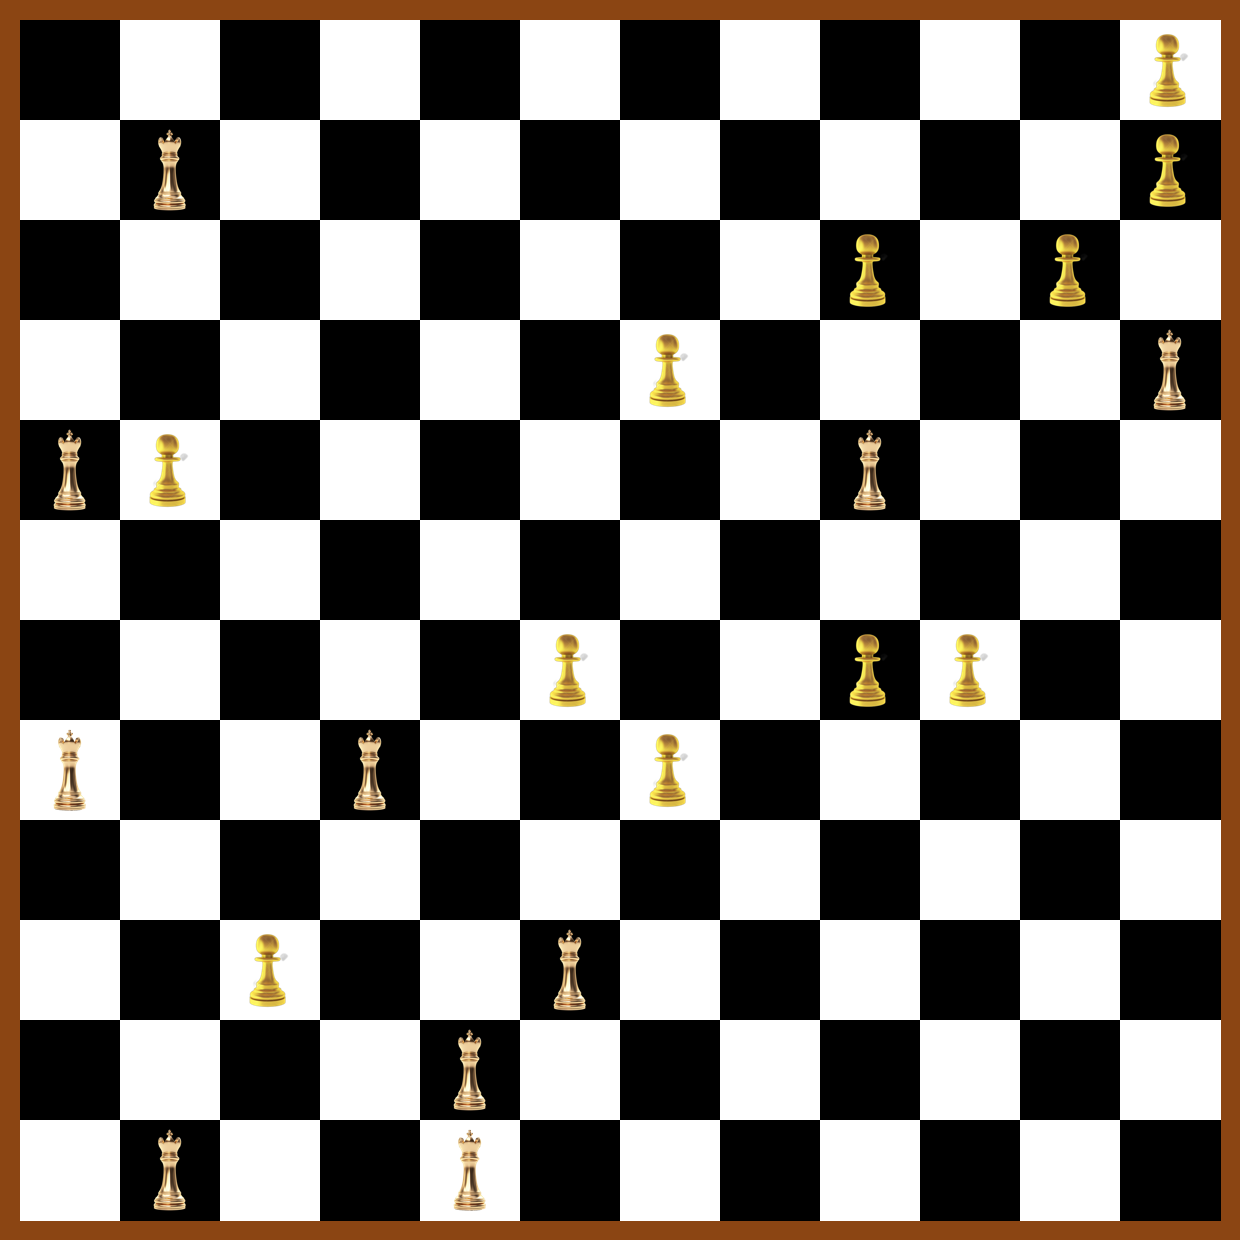

In [8]:
chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_1.png")

# Functions to Counting pairs of Queens that threatened each other

In [9]:
def count_queen_threats(board):
    n = len(board)
    count = 0
    threats = []
    threat_set = set()

    for i in range(n):
        for j in range(n):
            if board[i][j] == 9:  # Queen found
                new_count, new_threats = count_threats(board, i, j, threat_set)
                count += new_count
                threats.extend(new_threats)

    return count, threats


def count_threats(board, row, col, threat_set):
    n = len(board)
    count = 0
    threats = []

    # Check horizontally and vertically
    for i in range(n):
        if i != col and board[row][i] == 9:  # Check horizontally
            if not has_obstacle(board, row, col, row, i):
                pair = ((row, i), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)
        if i != row and board[i][col] == 9:  # Check vertically
            if not has_obstacle(board, row, col, i, col):
                pair = ((i, col), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)

    # Check diagonally (top-left to bottom-right)
    i, j = row - 1, col - 1
    while i >= 0 and j >= 0:
        if board[i][j] == 9:
            if not has_obstacle(board, row, col, i, j):
                pair = ((i, j), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)
        i -= 1
        j -= 1

    i, j = row + 1, col + 1
    while i < n and j < n:
        if board[i][j] == 9:
            if not has_obstacle(board, row, col, i, j):
                pair = ((i, j), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)
        i += 1
        j += 1

    # Check diagonally (top-right to bottom-left)
    i, j = row - 1, col + 1
    while i >= 0 and j < n:
        if board[i][j] == 9:
            if not has_obstacle(board, row, col, i, j):
                pair = ((i, j), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)
        i -= 1
        j += 1

    i, j = row + 1, col - 1
    while i < n and j >= 0:
        if board[i][j] == 9:
            if not has_obstacle(board, row, col, i, j):
                pair = ((i, j), (row, col))
                if pair not in threat_set and pair[::-1] not in threat_set:  # Check for duplicates
                    count += 1
                    threats.append(pair)
                    threat_set.add(pair)
        i += 1
        j -= 1

    return count, threats


def has_obstacle(board, row1, col1, row2, col2):
    if row1 == row2:
        # Check horizontally
        for col in range(min(col1, col2) + 1, max(col1, col2)):
            if board[row1][col] != 0:
                return True
    elif col1 == col2:
        # Check vertically
        for row in range(min(row1, row2) + 1, max(row1, row2)):
            if board[row][col1] != 0:
                return True
    else:
        # Check diagonally
        row_diff = abs(row2 - row1)
        col_diff = abs(col2 - col1)
        row_step = -1 if row1 > row2 else 1
        col_step = -1 if col1 > col2 else 1

        for i in range(1, max(row_diff, col_diff)):
            row = row1 + i * row_step
            col = col1 + i * col_step
            if board[row][col] != 0:
                return True

    return False

Num_Queen_Threats, Threat_cases = count_queen_threats(board)
print("Number of Queen Threats:",  Num_Queen_Threats)
print("Threat Cases:",  Threat_cases)

Number of Queen Threats: 6
Threat Cases: [((0, 1), (0, 0)), ((8, 0), (0, 0)), ((0, 10), (0, 1)), ((10, 8), (4, 2)), ((8, 3), (8, 0)), ((11, 7), (10, 8))]


# Functions to counting the number of soldiers that were threatened by queens

In [10]:
def Sum_Score_of_Threatened_Pawns(board):
    threatened_pawns = []
    pawn_scores = []

    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] != 0 and board[i][j] != 9:  # Pawn found
                is_threatened, pawn_score = is_pawn_threatened(board, i, j)
                if is_threatened:
                    threatened_pawns.append((i, j))
                    pawn_scores.append(pawn_score)
    return sum(pawn_scores)


def is_pawn_threatened(board, pawn_row, pawn_col):
    n = len(board)
    pawn_score = board[pawn_row][pawn_col]

    # Check horizontally and vertically
    for i in range(n):
        if i != pawn_col:
            if board[pawn_row][i] == 9:  # Pawn threatened horizontally
                if no_pawn_between(board, pawn_row, pawn_col, pawn_row, i):
                    return True, pawn_score

        if i != pawn_row:
            if board[i][pawn_col] == 9:  # Pawn threatened vertically
                if no_pawn_between(board, pawn_row, pawn_col, i, pawn_col):
                    return True, pawn_score

    # Check diagonally (top-left to bottom-right)
    i, j = pawn_row - 1, pawn_col - 1
    while i >= 0 and j >= 0:
        if board[i][j] == 9:  # Pawn threatened diagonally
            if no_pawn_between(board, pawn_row, pawn_col, i, j):
                return True, pawn_score
        i -= 1
        j -= 1

    i, j = pawn_row + 1, pawn_col + 1
    while i < n and j < n:
        if board[i][j] == 9:  # Pawn threatened diagonally
            if no_pawn_between(board, pawn_row, pawn_col, i, j):
                return True, pawn_score
        i += 1
        j += 1

    # Check diagonally (top-right to bottom-left)
    i, j = pawn_row - 1, pawn_col + 1
    while i >= 0 and j < n:
        if board[i][j] == 9:  # Pawn threatened diagonally
            if no_pawn_between(board, pawn_row, pawn_col, i, j):
                return True, pawn_score
        i -= 1
        j += 1

    i, j = pawn_row + 1, pawn_col - 1
    while i < n and j >= 0:
        if board[i][j] == 9:  # Pawn threatened diagonally
            if no_pawn_between(board, pawn_row, pawn_col, i, j):
                return True, pawn_score
        i += 1
        j -= 1

    return False, pawn_score

def no_pawn_between(board, row1, col1, row2, col2):
    # Check if there is something between two pawns in a line
    # and the two pawns at the end of the line cannot threaten each other
    if row1 == row2:
        start_col = min(col1, col2)
        end_col = max(col1, col2)
        for col in range(start_col + 1, end_col):
            if board[row1][col] != 0:
                return False

    elif col1 == col2:
        start_row = min(row1, row2)
        end_row = max(row1, row2)
        for row in range(start_row + 1, end_row):
            if board[row][col1] != 0:
                return False

    elif abs(row1 - row2) == abs(col1 - col2):
        start_row = min(row1, row2)
        start_col = min(col1, col2)
        end_row = max(row1, row2)
        end_col = max(col1, col2)
        row = start_row + 1
        col = start_col + 1
        while row < end_row and col < end_col:
            if board[row][col] != 0:
                return False
            row += 1
            col += 1
    return True

# Fitness Calculation Function

In [11]:
def fitness(board):
    
    Threatened_Pawns_Sum_Score = Sum_Score_of_Threatened_Pawns(board)
    num_threats, threatening_pairs = count_queen_threats(board)
    Threatened_Queens_Sum_Score = num_threats * -2
    Total_fitness = Threatened_Pawns_Sum_Score + Threatened_Queens_Sum_Score

    return Total_fitness

# Calculating the Best Fitness

In [12]:
def BestFitness(Soldiers):

    total_score = []
    for i in range(len(Soldiers)):
        pos, score = Soldiers[i]
        total_score.append(score)

    return sum(total_score)

Best_fitness = BestFitness(SOLDIERS)
Best_fitness

19

# Initializing the evolutionary algorithm parameters

In [13]:
# Parameters
population_size = 100
num_generations = 300
mutation_rate = 0.1

# Initializing the Population

In [14]:
def initialize_population(population_size, BoardSize, SOLDIERS):
    population = []
    for _ in range(population_size):
        queens = Queens1(BoardSize, SOLDIERS)
        population.append(queens)
    return population

In [15]:
# Initialization
Queens_population = initialize_population(population_size, n, SOLDIERS)

# Roulette Wheel Selection

In [16]:
def roulette_wheel_selection(population, scores, num_parents):
    # Add a constant value to all fitness scores to make them non-negative
    min_score = min(scores)
    transformed_scores = [score - min_score + 1 for score in scores]

    total_fitness = sum(transformed_scores)
    probabilities = [score / total_fitness for score in transformed_scores]

    selected_parents = []
    for _ in range(num_parents):
        r = random.random()
        cumulative_probability = 0.0
        for i, individual in enumerate(population):
            cumulative_probability += probabilities[i]
            if cumulative_probability > r:
                selected_parents.append(individual)
                break

    return selected_parents

# Single-Point Crossover

In [17]:
def crossover(parents, crossover_rate=0.9):
    offspring = []

    if random.random() < crossover_rate:  # Perform crossover with the given crossover rate
           
            parent1 , parent2 = parents 

            # Determine the length of the parents
            parent_length = len(parent1)

            unique_gene = []
            having_unique_gene = False
            unique_p1= False
            unique_p2 = False

            for i in parent1:
                for j in parent2:
                    if i == j:
                        if i not in unique_gene:
                            unique_gene.append(i)
                            having_unique_gene = True

            if having_unique_gene:
                non_unique_gene_parent_1 = []
                non_unique_gene_parent_2 = []


                for i in parent1:
                    unique_p1 = True
                    for j in unique_gene:
                        if i == j:
                            unique_p1 = False
                            break
                    if unique_p1:
                        if i not in non_unique_gene_parent_2 and i not in non_unique_gene_parent_1:

                            non_unique_gene_parent_1.append(i)

                for i in parent2:
                    unique_p2 = True
                    for j in unique_gene:
                        if i == j:
                            unique_p2 = False
                            break
                    if unique_p2:
                        if i not in non_unique_gene_parent_2 and i not in non_unique_gene_parent_1:
                            non_unique_gene_parent_2.append(i)


                if len(non_unique_gene_parent_1)  != 1 and len(non_unique_gene_parent_1)  != 0:

                    # Select a random crossover point
                    crossover_point = random.randint(1, len(non_unique_gene_parent_1) -1 )

                    child1 = unique_gene + non_unique_gene_parent_1[:crossover_point] + non_unique_gene_parent_2[crossover_point:]
                    child2 = unique_gene + non_unique_gene_parent_2[:crossover_point] + non_unique_gene_parent_1[crossover_point:]

                    offspring.append(child1)
                    offspring.append(child2)

                else:
                    offspring = parents

            else:
                # Select a random crossover point
                crossover_point = random.randint(1, parent_length - 1)

                # Perform single-point crossover
                child1 = parent1[:crossover_point] + parent2[crossover_point:]
                child2 = parent2[:crossover_point] + parent1[crossover_point:]

                offspring.append(child1)
                offspring.append(child2)
                
    else:
            offspring = parents

    return offspring

# Calculating the fitness score for our population

In [18]:
def evaluate_population(population, SOLDIERS):
    scores = []
    
    n = len(SOLDIERS) + 1
    
    for queens in population:
        board = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(len(SOLDIERS)):
            board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]
        for i in range(len(queens)):
            board[queens[i][0][0] - 1][queens[i][0][1] - 1] = queens[i][1]
        score = fitness(board)
        scores.append(score)
    return scores

# Mutation Function

In [19]:
def creep_mutation(queens, soldiers, mutation_rate=0.1):
    mutated_queens = queens.copy()
    Soldier_Positions = [soldier[0] for soldier in soldiers]
    queens_positions = [queen[0] for queen in queens]
    BoardSize = len(queens) + 2

    allPossiblePositions = []
    for i in range(1, BoardSize + 1):
        for j in range(1, BoardSize + 1):
            if [i, j] not in Soldier_Positions and [i, j] not in queens_positions:
                allPossiblePositions.append([i, j])

    random.shuffle(allPossiblePositions)

    for gene_index in range(len(mutated_queens)):
        if random.random() < mutation_rate:
            new_queen_position = random.choice(allPossiblePositions)

            old_queen_position = mutated_queens[gene_index][0]
            queens_positions.remove(old_queen_position)
            allPossiblePositions.append(old_queen_position)

            mutated_queens[gene_index] = (new_queen_position, mutated_queens[gene_index][1])

            queens_positions.append(new_queen_position)
            allPossiblePositions.remove(new_queen_position)

    return mutated_queens

# 1.a.

# Evolutionary Algorithm

Generation 1 - Best Score: 13
Generation 2 - Best Score: 13
Generation 3 - Best Score: 16
Generation 4 - Best Score: 19


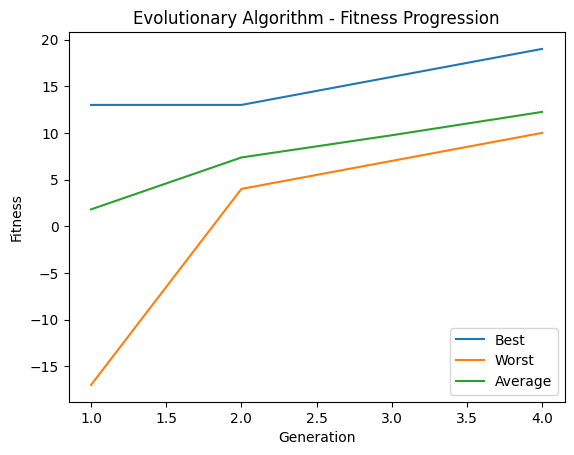

10


In [20]:
num_generations = 300
population_size = 100

# Initialization
Queens_population = initialize_population(population_size, n, SOLDIERS)

# Lists to store best, worst, and average fitness values
best_fitness_values = []
worst_fitness_values = []
average_fitness_values = []

# Evolution loop
for generation in range(300):
    # Evaluate population
    scores = evaluate_population(Queens_population, SOLDIERS)
    best_score = max(scores)
    worst_score = min(scores)
    average_score = sum(scores) / len(scores)

    # Store fitness values
    best_fitness_values.append(best_score)
    worst_fitness_values.append(worst_score)
    average_fitness_values.append(average_score)

    # Print generation information
    print(f"Generation {generation+1} - Best Score: {best_score}")

    if best_score != Best_fitness:

        # Selection
        parents = roulette_wheel_selection(Queens_population, scores, population_size)
        

        # Shuffle parentsPool
        random.shuffle(parents)

        # Randomly pair solutions
        paired_parents = []
        num_parents = len(parents)
        for i in range(0, num_parents, 2):
            if i + 1 < num_parents:
                paired_parents.append([parents[i], parents[i + 1]])
            else:
                # If the number of parents is odd, handle the last parent separately
                paired_parents.append([parents[i]])
            

        # Crossover
        offspring = []
        for pair in paired_parents:
            child1, child2 = crossover(pair)
            offspring.append(child1)
            offspring.append(child2)
                
                
        # Mutation
        for i in range(len(offspring)):
            old_off = offspring[i]
            offspring[i] = creep_mutation(offspring[i], SOLDIERS)

        # Combine parents and offspring populations
        combined_population = parents + offspring

        # Evaluate combined population

        combined_scores = evaluate_population(combined_population, SOLDIERS)

        # Select the best individuals for the next generation
        sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

        best_queens = combined_population[sorted_indices[0]]
        Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]

    else:
        break

# Plotting the evolution graph
generations = range(1, len(best_fitness_values) + 1)

plt.plot(generations, best_fitness_values, label='Best')
plt.plot(generations, worst_fitness_values, label='Worst')
plt.plot(generations, average_fitness_values, label='Average')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Fitness Progression')
plt.legend()

plt.show()

print(len(best_queens))

# Visualizing the board

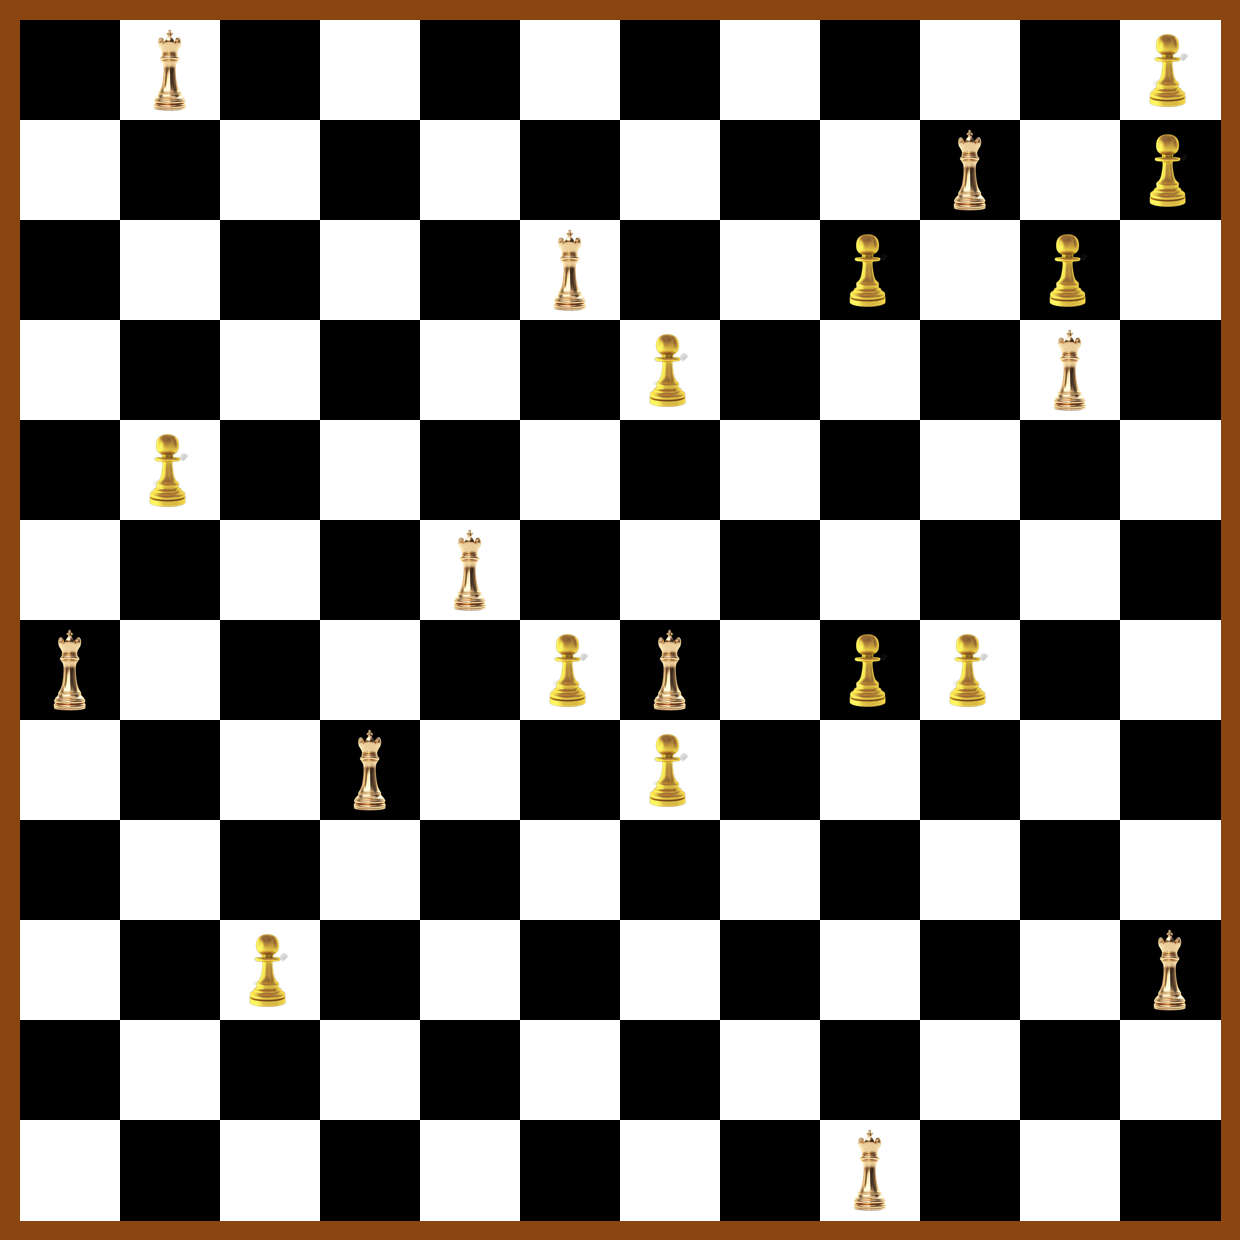

In [21]:
Queens = best_queens

# Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
    board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
    board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

In [22]:
best_queens

[[[3, 6], 9],
 [[7, 1], 9],
 [[12, 9], 9],
 [[10, 12], 9],
 [[4, 11], 9],
 [[7, 7], 9],
 [[6, 5], 9],
 [[2, 10], 9],
 [[8, 4], 9],
 [[1, 2], 9]]

# 1.b.

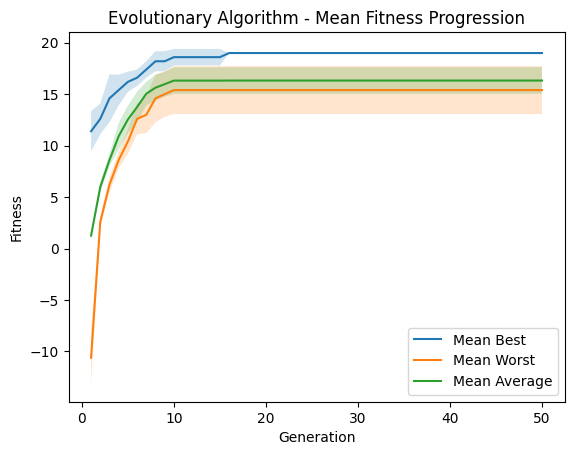

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 300
population_size = 100

# Initialize lists to store the fitness values for each run
best_fitness_values_all_runs = []
worst_fitness_values_all_runs = []
average_fitness_values_all_runs = []

Best_Queen = []

# Perform multiple runs
for run in range(num_runs):
    # Initialization
    Queens_population = initialize_population(population_size, n, SOLDIERS)

    # Lists to store best, worst, and average fitness values for each run
    best_fitness_values = []
    worst_fitness_values = []
    average_fitness_values = []

    # Evolution loop
    for generation in range(num_generations):
        # Evaluate population
        scores = evaluate_population(Queens_population, SOLDIERS)
        best_score = max(scores)
        worst_score = min(scores)
        average_score = sum(scores) / len(scores)

        # Store fitness values
        best_fitness_values.append(best_score)
        worst_fitness_values.append(worst_score)
        average_fitness_values.append(average_score)

        if best_score != Best_fitness:

            # Selection
            parents = roulette_wheel_selection(Queens_population, scores, population_size)

            # Shuffle parentsPool
            random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            # Crossover
            offspring = []
            for pair in paired_parents:
                child1, child2 = crossover(pair)
                offspring.append(child1)
                offspring.append(child2)

            # Mutation
            for i in range(len(offspring)):
                old_off = offspring[i]
                offspring[i] = creep_mutation(offspring[i], SOLDIERS)

            # Combine parents and offspring populations
            combined_population = parents + offspring

            # Evaluate combined population
            combined_scores = evaluate_population(combined_population, SOLDIERS)

            # Select the best individuals for the next generation
            sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

            best_queens = combined_population[sorted_indices[0]]
            Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
            
            
    Best_Queen.append(best_queens)
        
    # Store fitness values for this run
    best_fitness_values_all_runs.append(best_fitness_values)
    worst_fitness_values_all_runs.append(worst_fitness_values)
    average_fitness_values_all_runs.append(average_fitness_values)
    
    

# Calculate the mean and standard deviation for each generation across all runs
mean_best_fitness_values = np.mean(best_fitness_values_all_runs, axis=0)
mean_worst_fitness_values = np.mean(worst_fitness_values_all_runs, axis=0)
mean_average_fitness_values = np.mean(average_fitness_values_all_runs, axis=0)

std_best_fitness_values = np.std(best_fitness_values_all_runs, axis=0)
std_worst_fitness_values = np.std(worst_fitness_values_all_runs, axis=0)
std_average_fitness_values = np.std(average_fitness_values_all_runs, axis=0)

# Plotting the evolution graph
generations = range(1, 51)

plt.plot(generations, mean_best_fitness_values[:50], label='Mean Best')
plt.fill_between(generations, mean_best_fitness_values[:50] - std_best_fitness_values[:50],
                 mean_best_fitness_values[:50] + std_best_fitness_values[:50], alpha=0.2)

plt.plot(generations, mean_worst_fitness_values[:50], label='Mean Worst')
plt.fill_between(generations, mean_worst_fitness_values[:50] - std_worst_fitness_values[:50],
                 mean_worst_fitness_values[:50] + std_worst_fitness_values[:50], alpha=0.2)

plt.plot(generations, mean_average_fitness_values[:50], label='Mean Average')
plt.fill_between(generations, mean_average_fitness_values[:50] - std_average_fitness_values[:50],
                 mean_average_fitness_values[:50] + std_average_fitness_values[:50], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

In [24]:
len(Best_Queen)

5

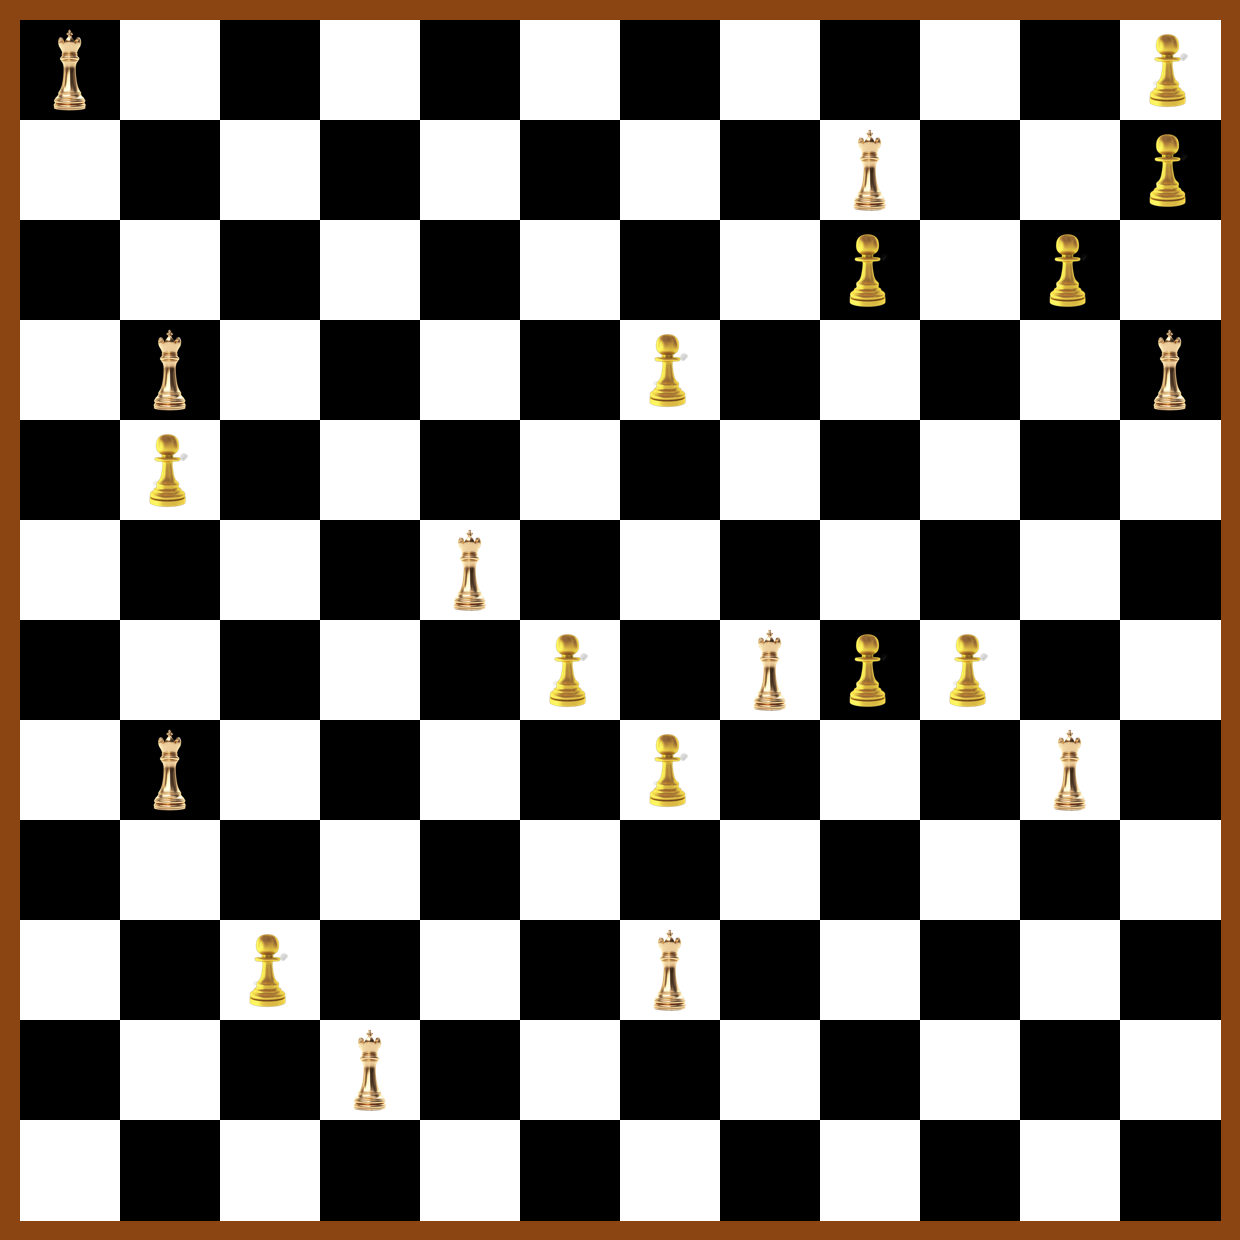

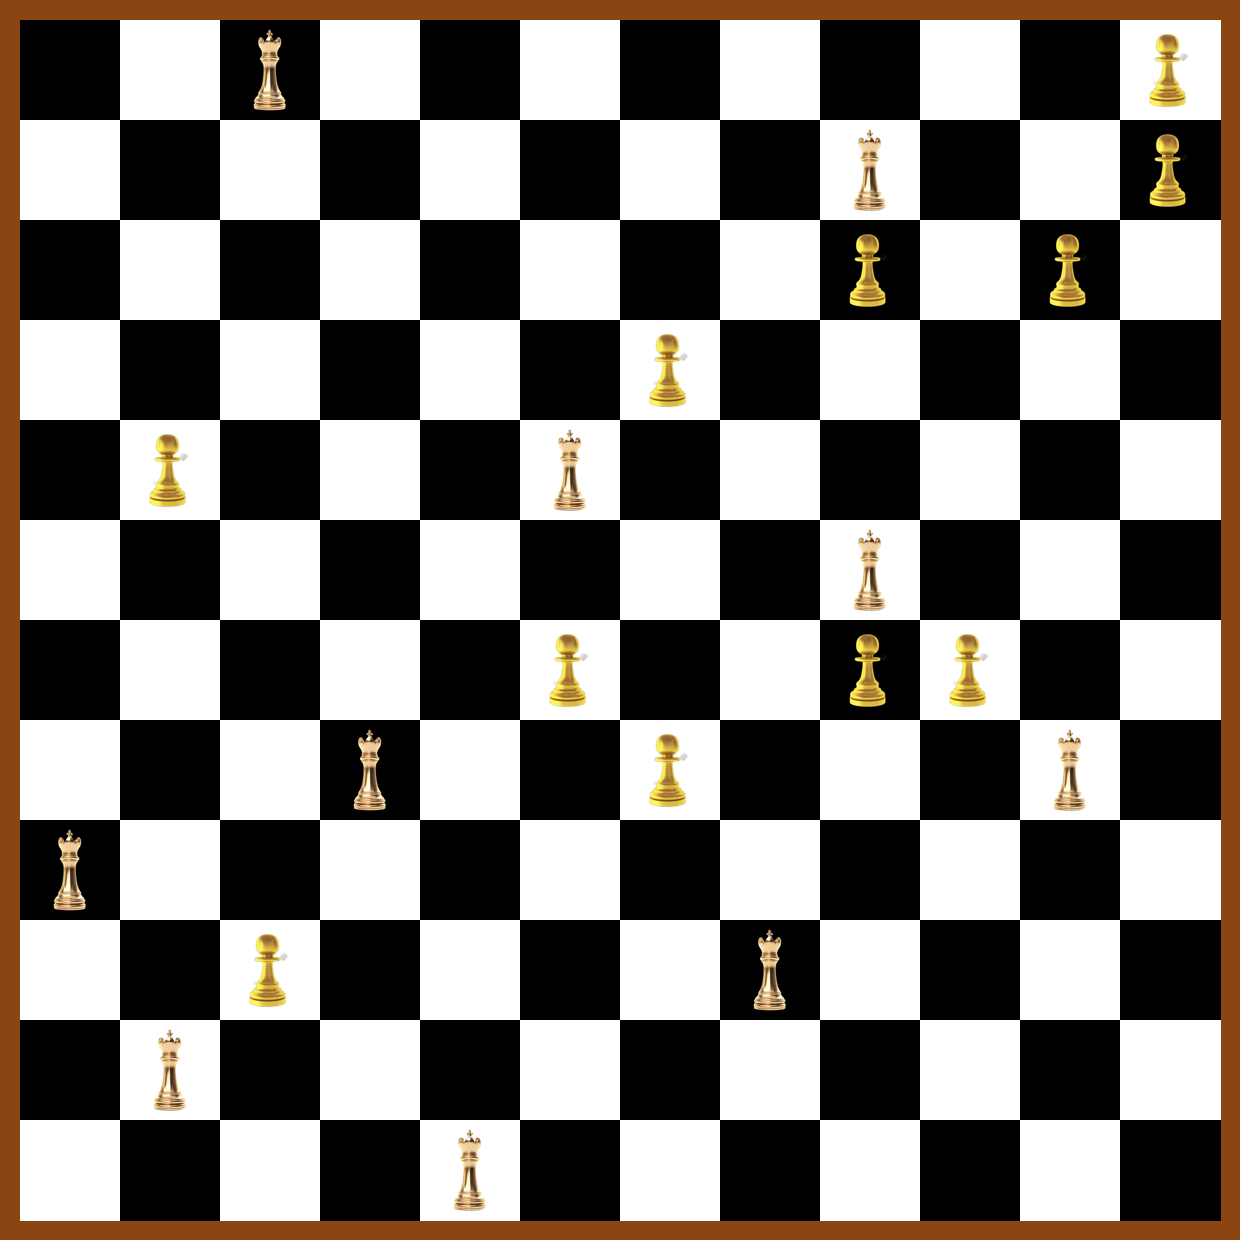

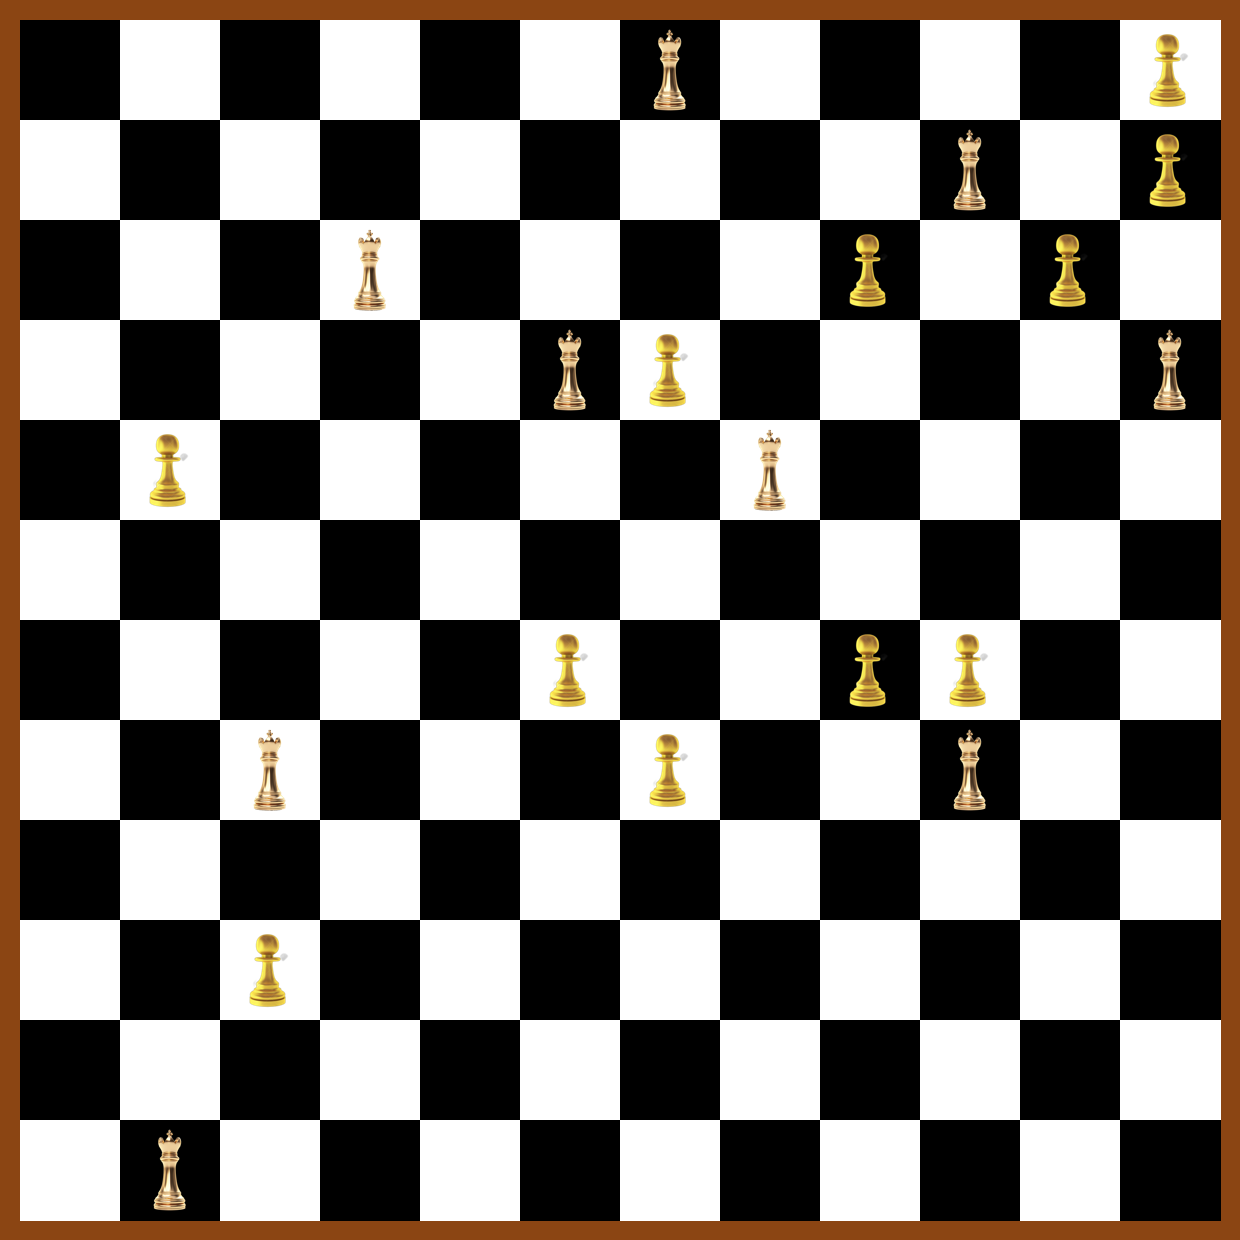

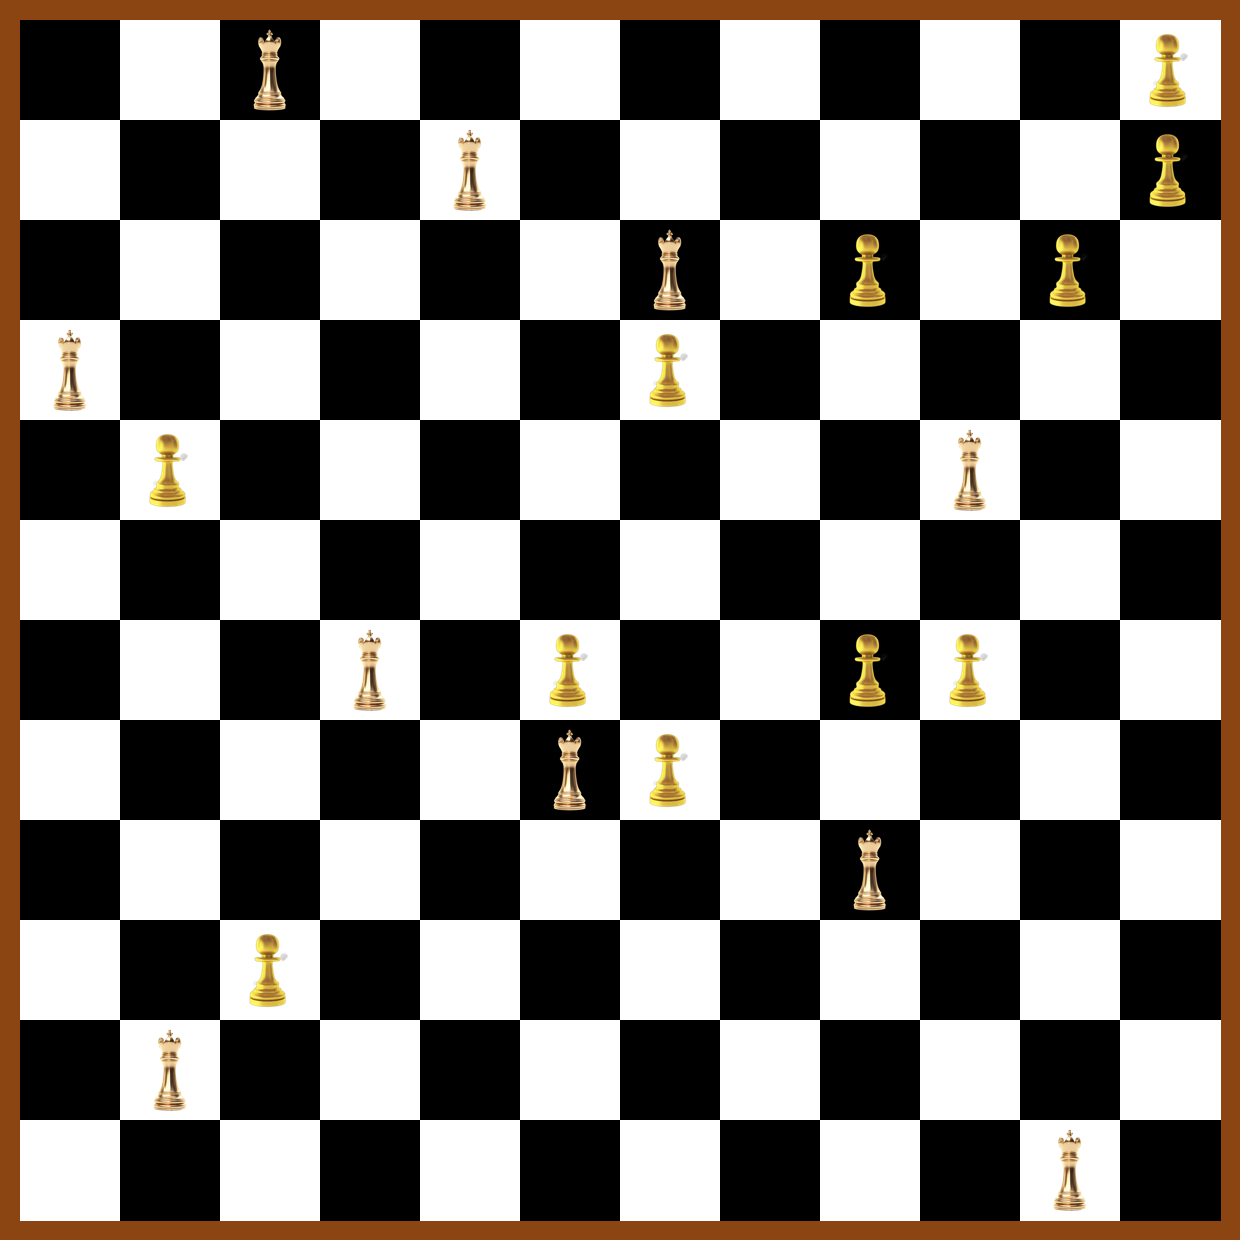

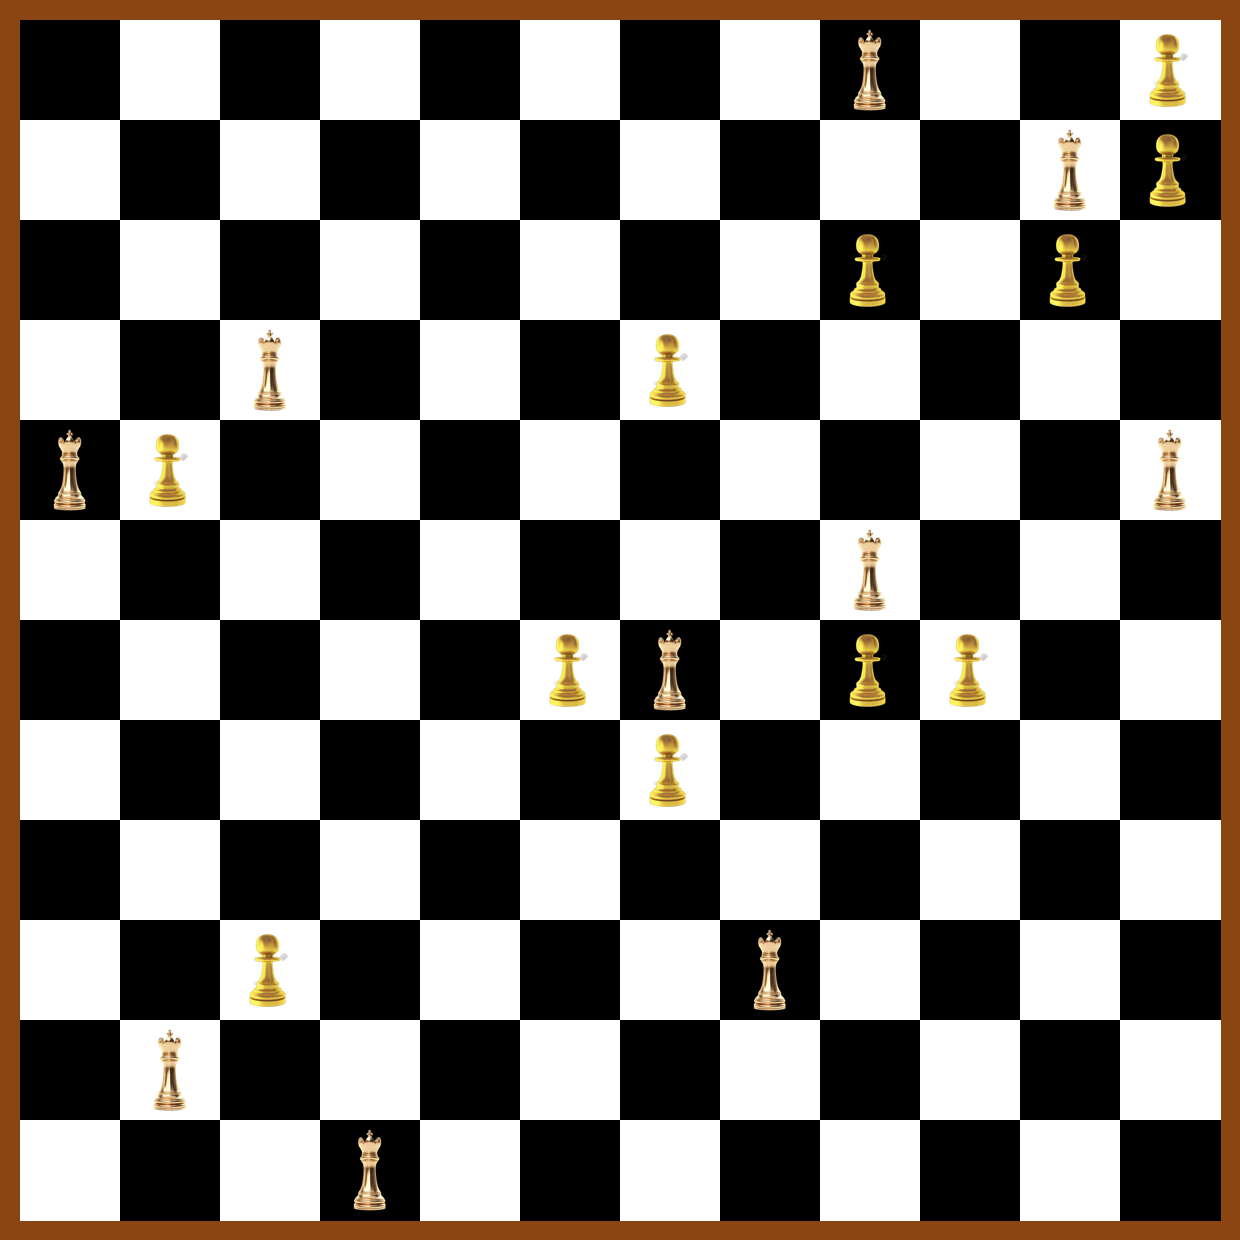

In [25]:
for Queens in Best_Queen:
    # Create the empty board
    board = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

    for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

    chessboard_image = generate_chessboard(board)
    display(chessboard_image)
    chessboard_image.save("chessboard_2_a.png")

# 1.c.

8
10
12
14
16
14
18
20


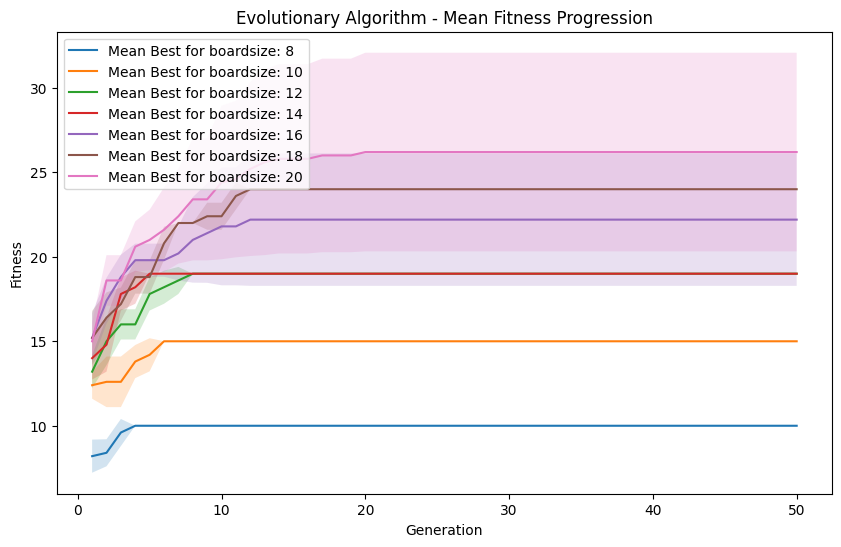

In [40]:
SOLDIERSs = [
    
    [[[7, 5], 1],
 [[1, 7], 2],
 [[1, 6], 1],
 [[5, 3], 2],
 [[8, 1], 1],
 [[7, 6], 1],
 [[7, 1], 2]],
    
    [[[5, 9], 1],
 [[7, 1], 2],
 [[1, 1], 1],
 [[8, 5], 2],
 [[4, 9], 1],
 [[9, 2], 1],
 [[2, 10], 2],
 [[3, 5], 3],
 [[3, 4], 2]],
    
    [[[7, 10], 1],
 [[8, 7], 2],
 [[4, 7], 1],
 [[3, 11], 2],
 [[2, 12], 1],
 [[10, 3], 1],
 [[7, 9], 2],
 [[1, 12], 3],
 [[5, 2], 2],
 [[7, 6], 2],
 [[3, 9], 2]],
    
    [[[14, 13], 1],
 [[1, 14], 2],
 [[2, 4], 1],
 [[6, 8], 2],
 [[5, 7], 1],
 [[2, 6], 1],
 [[10, 9], 2],
 [[1, 7], 3],
 [[6, 12], 2],
 [[8, 11], 2],
 [[9, 6], 2],
 [[7, 14], 1],
 [[4, 6], 3]],
    
    [[[15, 9], 1],
 [[15, 7], 2],
 [[15, 6], 1],
 [[7, 13], 2],
 [[6, 3], 1],
 [[8, 9], 1],
 [[14, 1], 2],
 [[12, 3], 3],
 [[2, 12], 2],
 [[2, 4], 2],
 [[16, 5], 2],
 [[2, 2], 1],
 [[10, 15], 3],
 [[7, 14], 3],
 [[10, 8], 1]],
    
    
    [[[10, 1], 1],
 [[17, 11], 2],
 [[7, 5], 1],
 [[17, 16], 2],
 [[18, 9], 1],
 [[1, 14], 1],
 [[18, 8], 2],
 [[12, 4], 3],
 [[14, 12], 2],
 [[15, 12], 2],
 [[2, 18], 2],
 [[2, 2], 1],
 [[12, 16], 3],
 [[10, 14], 3],
 [[6, 6], 1],
 [[7, 12], 2],
 [[8, 12], 2]],
    
    [[[8, 5], 1],
 [[6, 12], 2],
 [[10, 14], 1],
 [[7, 19], 2],
 [[1, 13], 1],
 [[10, 1], 1],
 [[1, 3], 2],
 [[14, 3], 3],
 [[19, 10], 2],
 [[11, 18], 2],
 [[20, 2], 2],
 [[5, 17], 1],
 [[4, 9], 3],
 [[20, 10], 3],
 [[16, 12], 1],
 [[16, 17], 2],
 [[7, 7], 2],
 [[2, 16], 1],
 [[10, 4], 2]]
    
    
]


import numpy as np
import matplotlib.pyplot as plt

# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 50
population_size = 300

ns = [8, 10, 12, 14, 16, 18, 20]

def evaluate_population(population, SOLDIERS):
    scores = []
    
    
    for queens in population:
        board = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(len(SOLDIERS)):
            board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]
        for i in range(len(queens)):
            board[queens[i][0][0] - 1][queens[i][0][1] - 1] = queens[i][1]
        score = fitness(board)
        scores.append(score)
    return scores

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {n: [] for n in ns}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for s in range(len(SOLDIERSs) ):
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []
    
    SOLDIERS = SOLDIERSs[s]
    n = len(SOLDIERS) + 1
    
    print(n)
    

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = roulette_wheel_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)
        Best_Queen.append(best_queens)

        # Store the best generation for this run and population size
        best_fitness_generations[n].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, n in enumerate(ns):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for boardsize: ' + str(n))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']



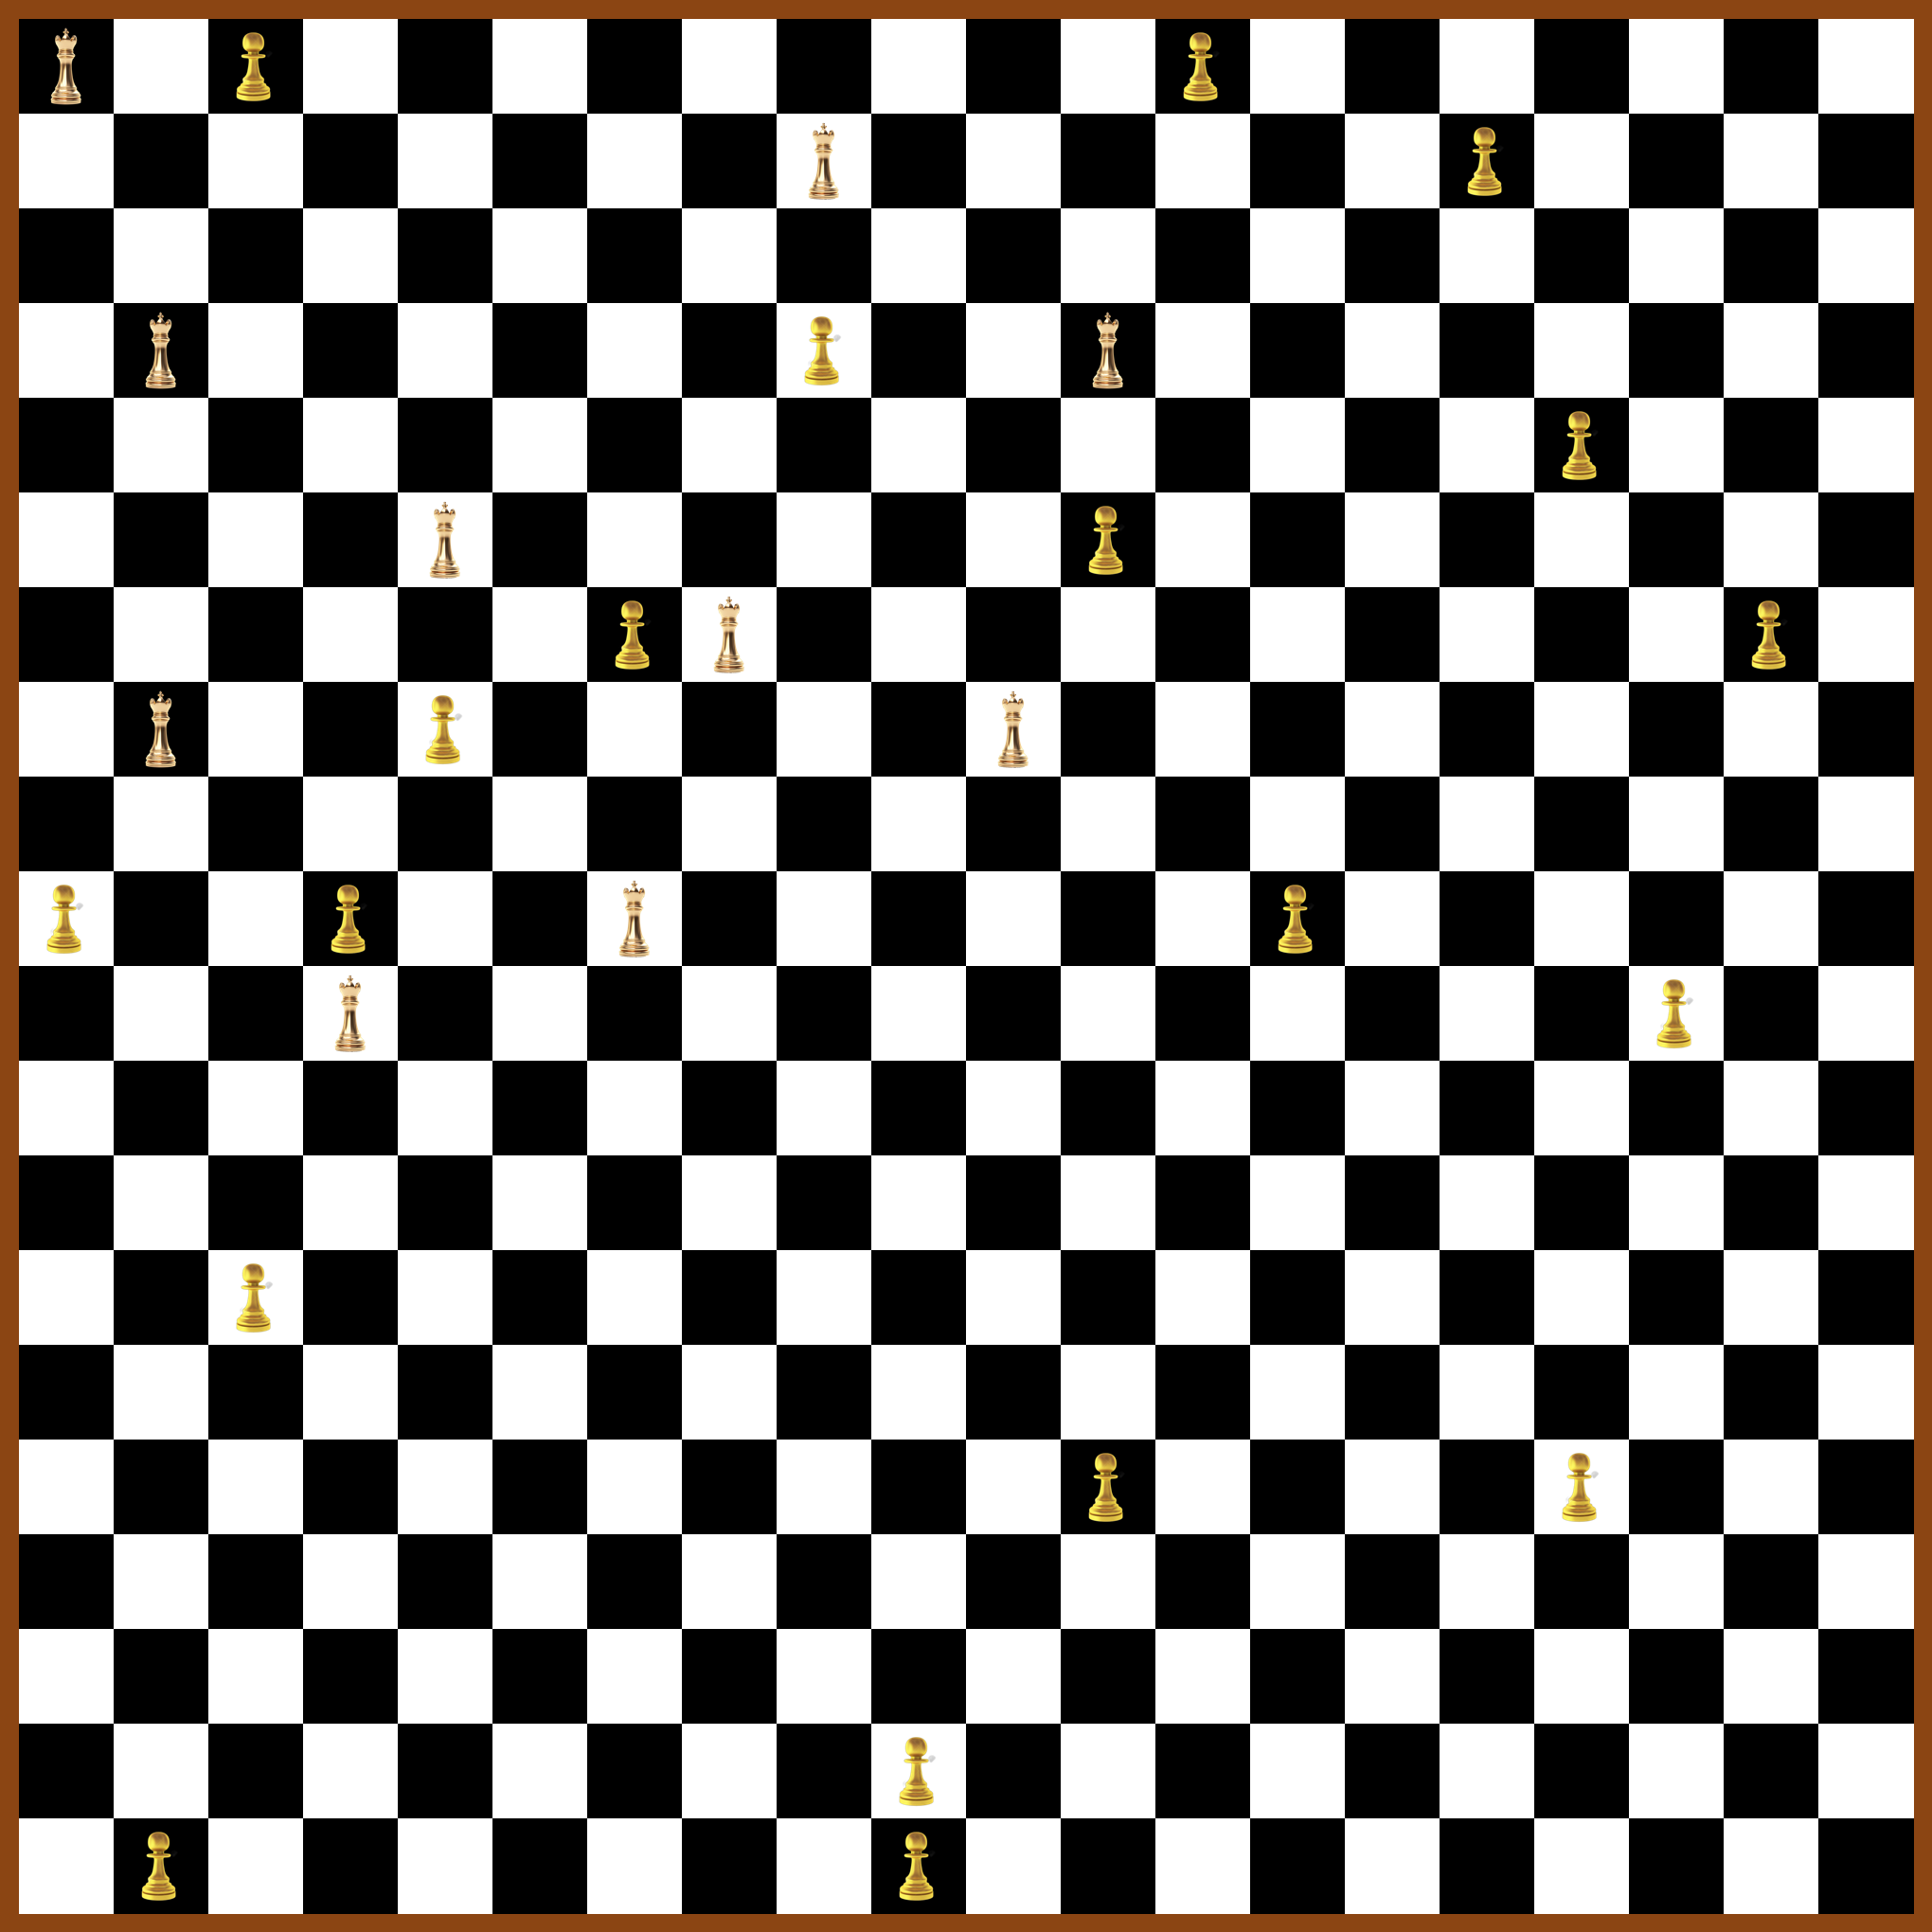

In [ ]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.d.

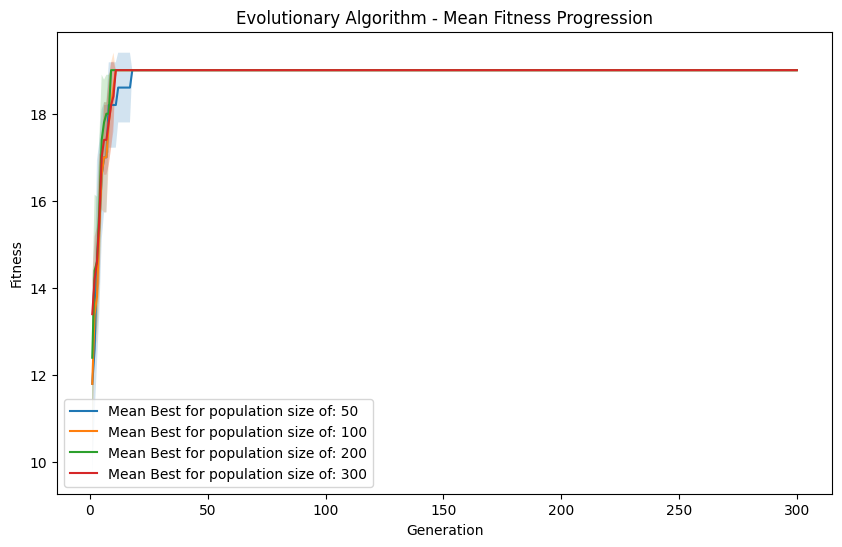

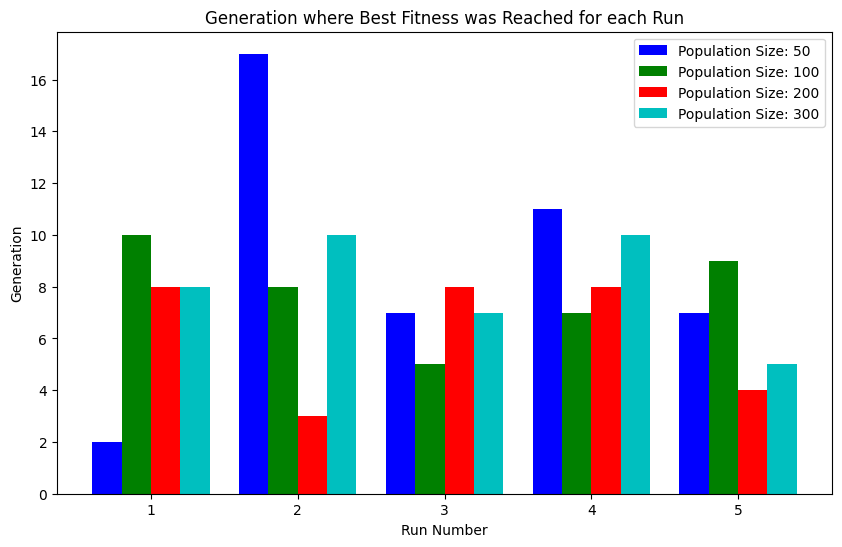

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 300
population_sizes = [50, 100, 200, 300]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {pop_size: [] for pop_size in population_sizes}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []


for population_size in population_sizes:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization and evolution loop...
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = roulette_wheel_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[population_size].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, pop_size in enumerate(population_sizes):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for population size of: ' + str(pop_size))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, pop_size in enumerate(population_sizes):
    plt.bar(x + i * width, best_fitness_generations[pop_size], width=width, color=colors[i],
            label='Population Size: ' + str(pop_size))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(population_sizes) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

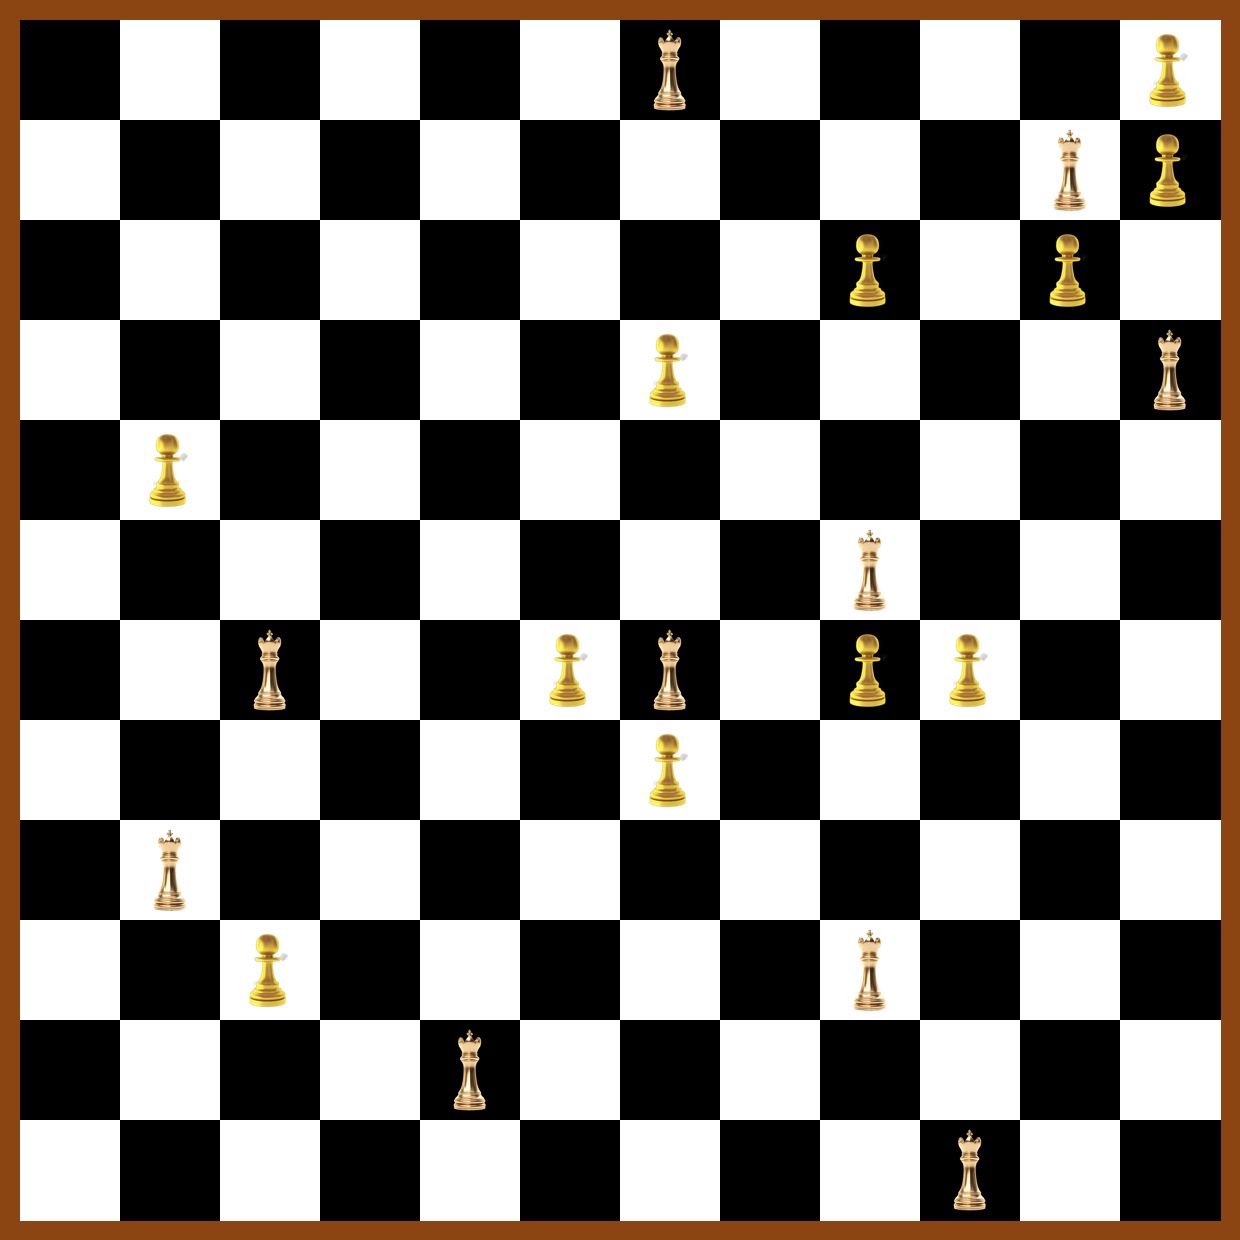

In [22]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.e.

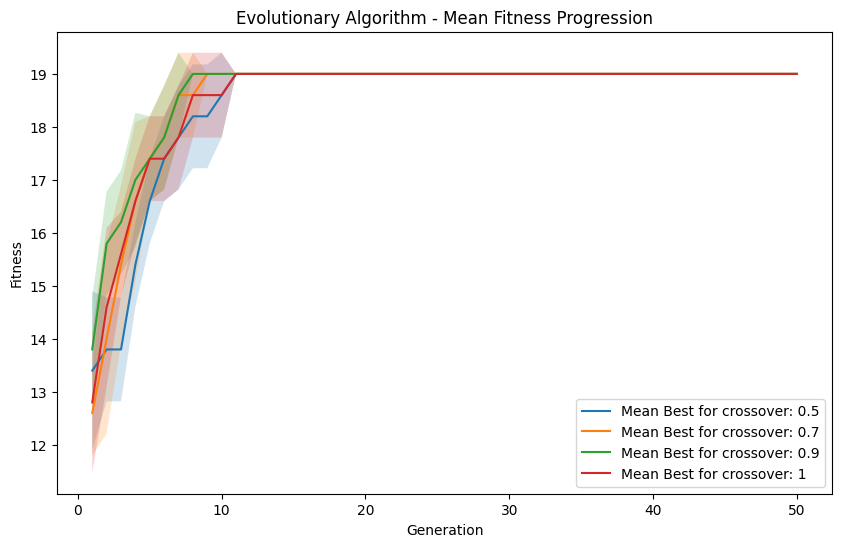

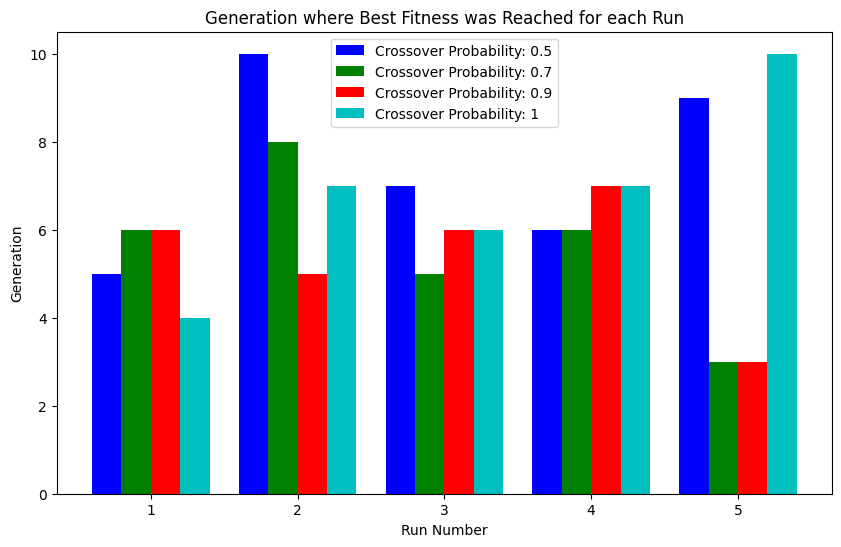

In [25]:
# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 50
population_size = 300

crossover_rates= [0.5, 0.7, 0.9, 1]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {crossover_rat: [] for crossover_rat in crossover_rates}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for crossover_rate in crossover_rates:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = roulette_wheel_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair, crossover_rate)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[crossover_rate].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, crossover_rat in enumerate(crossover_rates):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for crossover rate: ' + str(crossover_rat))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, crossover_rat in enumerate(crossover_rates):
    plt.bar(x + i * width, best_fitness_generations[crossover_rat], width=width, color=colors[i],
            label='Crossover Probability: ' + str(crossover_rat))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(crossover_rates) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

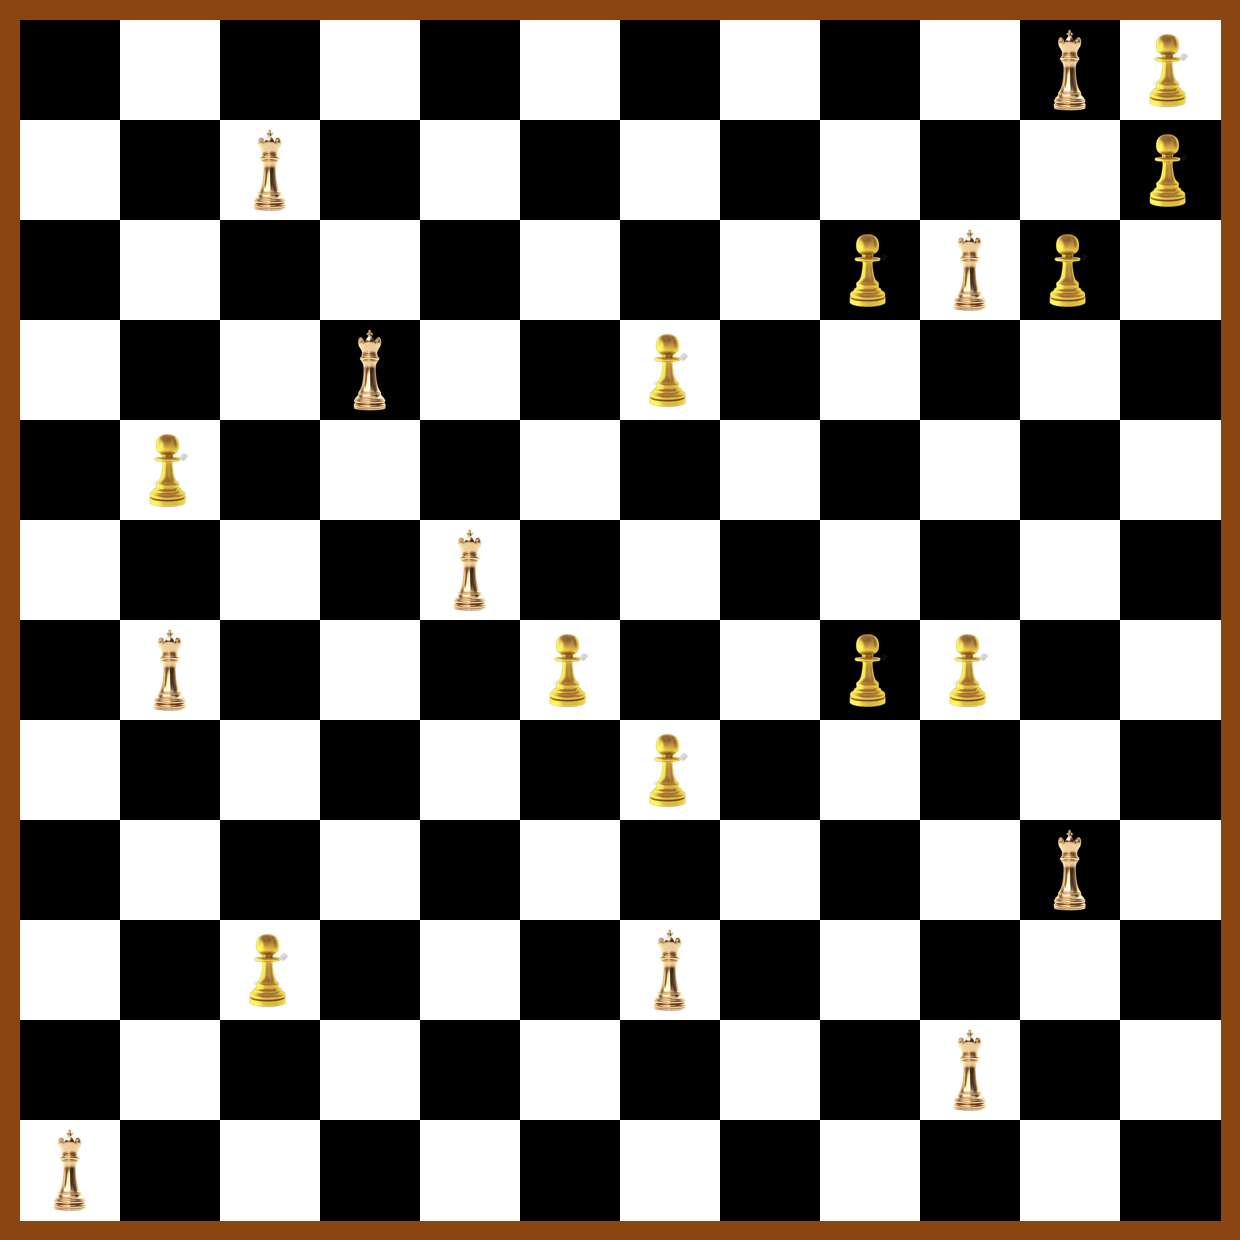

In [26]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.f.

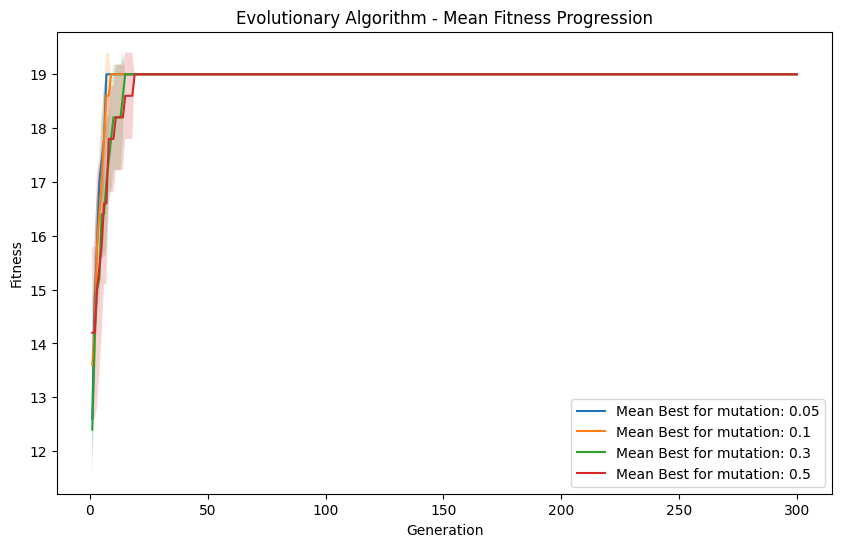

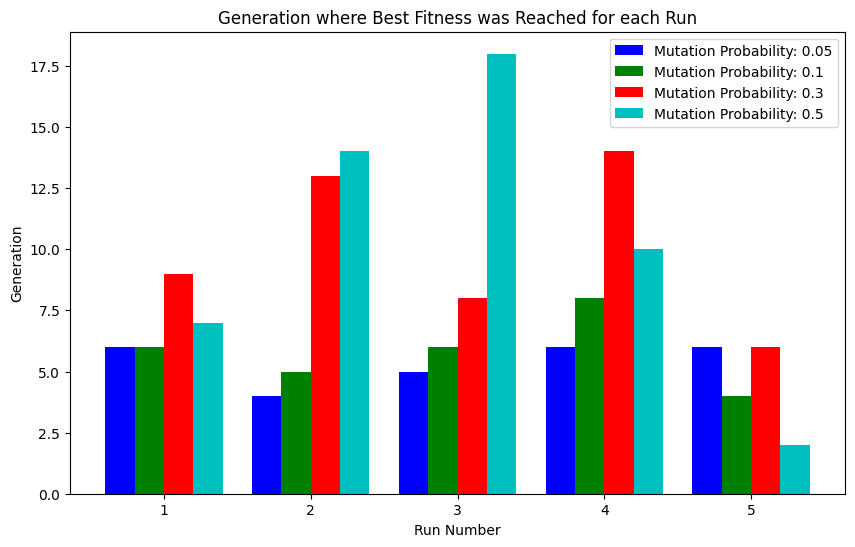

In [27]:
# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 300
population_size = 300

mutation_rates = [0.05, 0.1, 0.3, 0.5]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {mutation_rat: [] for mutation_rat in mutation_rates}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for mutation_rate in mutation_rates:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = roulette_wheel_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS, mutation_rate)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[mutation_rate].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, mutation_rat in enumerate(mutation_rates):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for mutation: ' + str(mutation_rat))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, mutation_rat in enumerate(mutation_rates):
    plt.bar(x + i * width, best_fitness_generations[mutation_rat], width=width, color=colors[i],
            label='Mutation Probability: ' + str(mutation_rat))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(mutation_rates) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

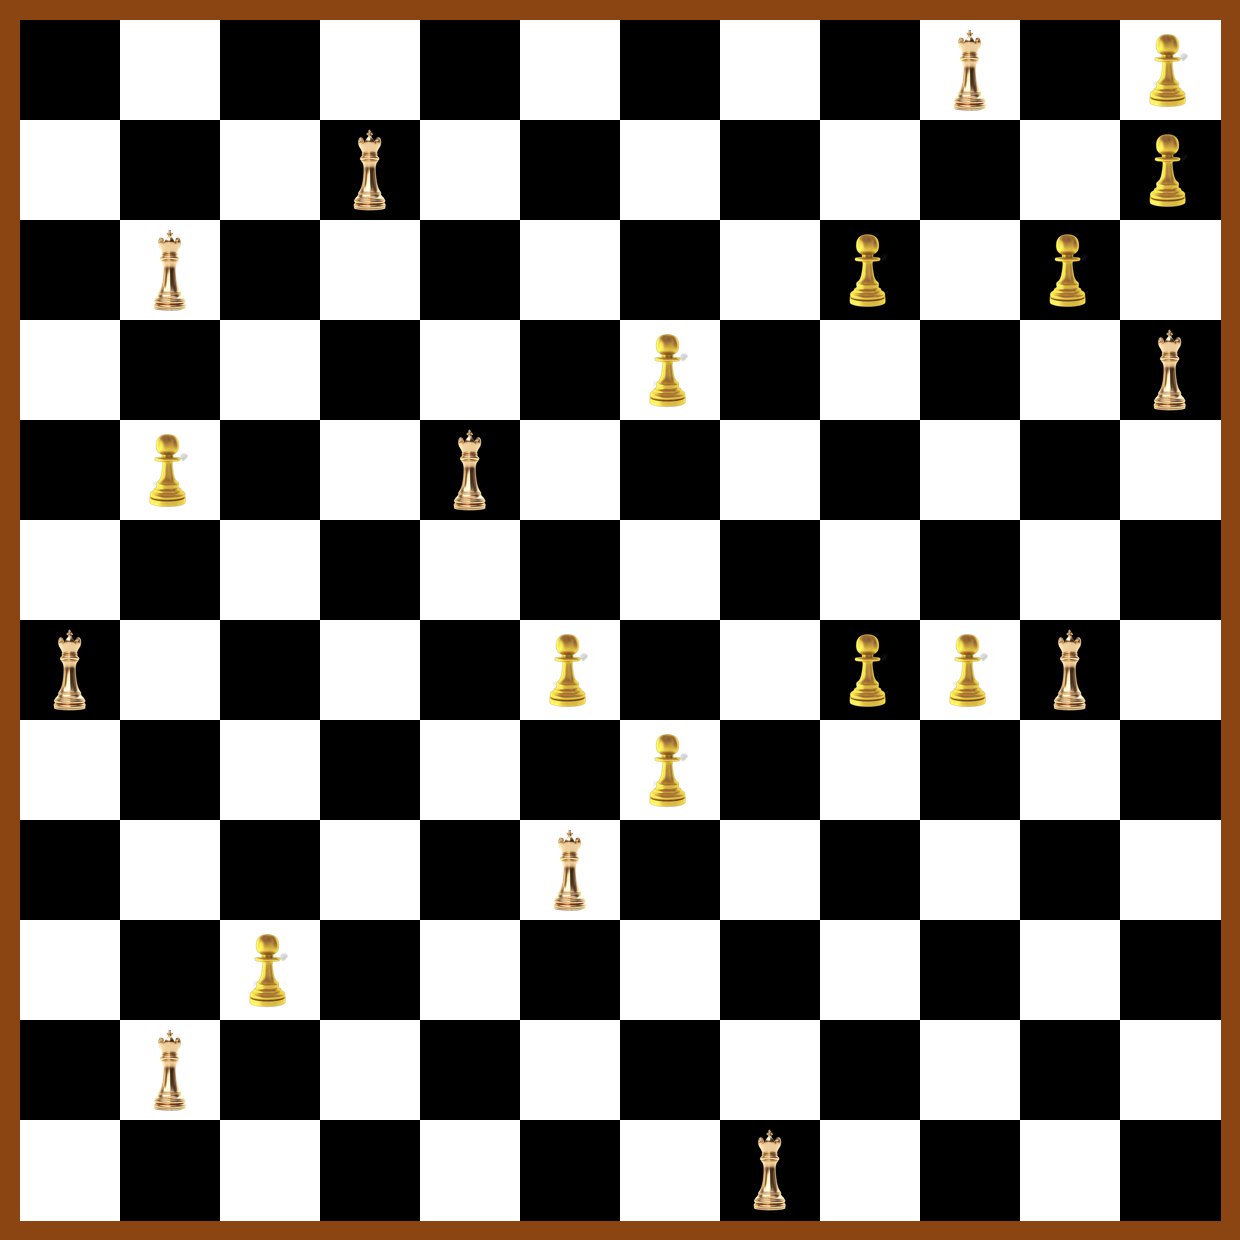

In [28]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.h.

# I just gave the best solution in the above codes

# 1.i.

# It is optional

In [24]:
import random

def binary_tournament_selection(population, scores, num_parents):
    selected_parents = []
    for _ in range(num_parents):
        # Randomly select two individuals from the population
        idx1 = random.randint(0, len(population) - 1)
        idx2 = random.randint(0, len(population) - 1)
        while idx2 == idx1:
            idx2 = random.randint(0, len(population) - 1)

        # Compare the fitness scores of the two individuals
        score1 = scores[idx1]
        score2 = scores[idx2]

        # Select the individual with the higher fitness score
        if score1 > score2:
            selected_parents.append(population[idx1])
        else:
            selected_parents.append(population[idx2])

    return selected_parents

# 1.i. for jim

8
10
12
14
16
14
18
20


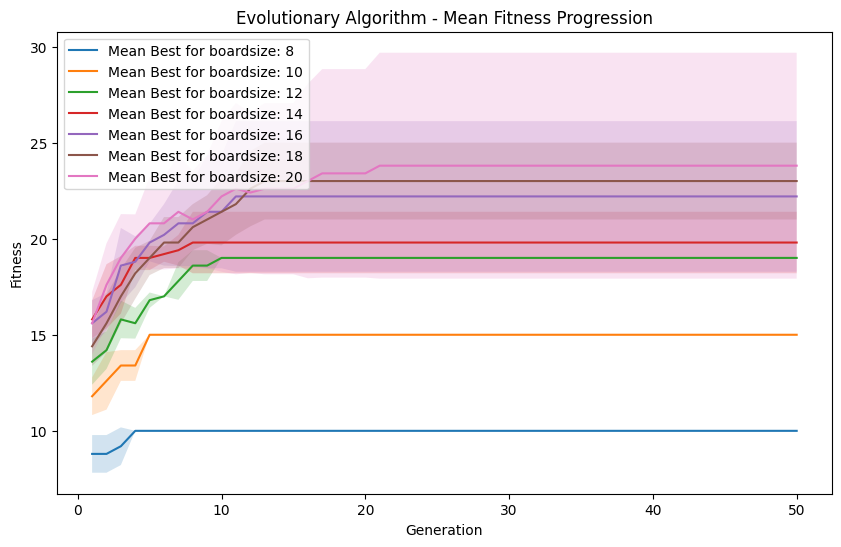

In [38]:
SOLDIERSs = [
    
    [[[7, 5], 1],
 [[1, 7], 2],
 [[1, 6], 1],
 [[5, 3], 2],
 [[8, 1], 1],
 [[7, 6], 1],
 [[7, 1], 2]],
    
    [[[5, 9], 1],
 [[7, 1], 2],
 [[1, 1], 1],
 [[8, 5], 2],
 [[4, 9], 1],
 [[9, 2], 1],
 [[2, 10], 2],
 [[3, 5], 3],
 [[3, 4], 2]],
    
    [[[7, 10], 1],
 [[8, 7], 2],
 [[4, 7], 1],
 [[3, 11], 2],
 [[2, 12], 1],
 [[10, 3], 1],
 [[7, 9], 2],
 [[1, 12], 3],
 [[5, 2], 2],
 [[7, 6], 2],
 [[3, 9], 2]],
    
    [[[14, 13], 1],
 [[1, 14], 2],
 [[2, 4], 1],
 [[6, 8], 2],
 [[5, 7], 1],
 [[2, 6], 1],
 [[10, 9], 2],
 [[1, 7], 3],
 [[6, 12], 2],
 [[8, 11], 2],
 [[9, 6], 2],
 [[7, 14], 1],
 [[4, 6], 3]],
    
    [[[15, 9], 1],
 [[15, 7], 2],
 [[15, 6], 1],
 [[7, 13], 2],
 [[6, 3], 1],
 [[8, 9], 1],
 [[14, 1], 2],
 [[12, 3], 3],
 [[2, 12], 2],
 [[2, 4], 2],
 [[16, 5], 2],
 [[2, 2], 1],
 [[10, 15], 3],
 [[7, 14], 3],
 [[10, 8], 1]],
    
    [[[10, 14], 2],
 [[8, 12], 2],
 [[7, 7], 1],
 [[12, 11], 2],
 [[10, 2], 1],
 [[1, 12], 2],
 [[4, 6], 3],
 [[13, 11], 1],
 [[13, 1], 3],
 [[13, 7], 2],
 [[13, 5], 2],
 [[11, 5], 1],
 [[6, 6], 2]],
    
    [[[10, 1], 1],
 [[17, 11], 2],
 [[7, 5], 1],
 [[17, 16], 2],
 [[18, 9], 1],
 [[1, 14], 1],
 [[18, 8], 2],
 [[12, 4], 3],
 [[14, 12], 2],
 [[15, 12], 2],
 [[2, 18], 2],
 [[2, 2], 1],
 [[12, 16], 3],
 [[10, 14], 3],
 [[6, 6], 1],
 [[7, 12], 2],
 [[8, 12], 2]],
    
    [[[8, 5], 1],
 [[6, 12], 2],
 [[10, 14], 1],
 [[7, 19], 2],
 [[1, 13], 1],
 [[10, 1], 1],
 [[1, 3], 2],
 [[14, 3], 3],
 [[19, 10], 2],
 [[11, 18], 2],
 [[20, 2], 2],
 [[5, 17], 1],
 [[4, 9], 3],
 [[20, 10], 3],
 [[16, 12], 1],
 [[16, 17], 2],
 [[7, 7], 2],
 [[2, 16], 1],
 [[10, 4], 2]]
    
    
]


import numpy as np
import matplotlib.pyplot as plt

# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 50
population_size = 300

ns = [8, 10, 12, 14, 16, 18, 20]

def evaluate_population(population, SOLDIERS):
    scores = []
    
    
    for queens in population:
        board = [[0 for _ in range(n)] for _ in range(n)]
        for i in range(len(SOLDIERS)):
            board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]
        for i in range(len(queens)):
            board[queens[i][0][0] - 1][queens[i][0][1] - 1] = queens[i][1]
        score = fitness(board)
        scores.append(score)
    return scores

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {n: [] for n in ns}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for s in range(len(SOLDIERSs) ):
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []
    
    SOLDIERS = SOLDIERSs[s]
    n = len(SOLDIERS) + 1
    
    print(n)
    

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = binary_tournament_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[n].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, n in enumerate(ns):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for boardsize: ' + str(n))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot



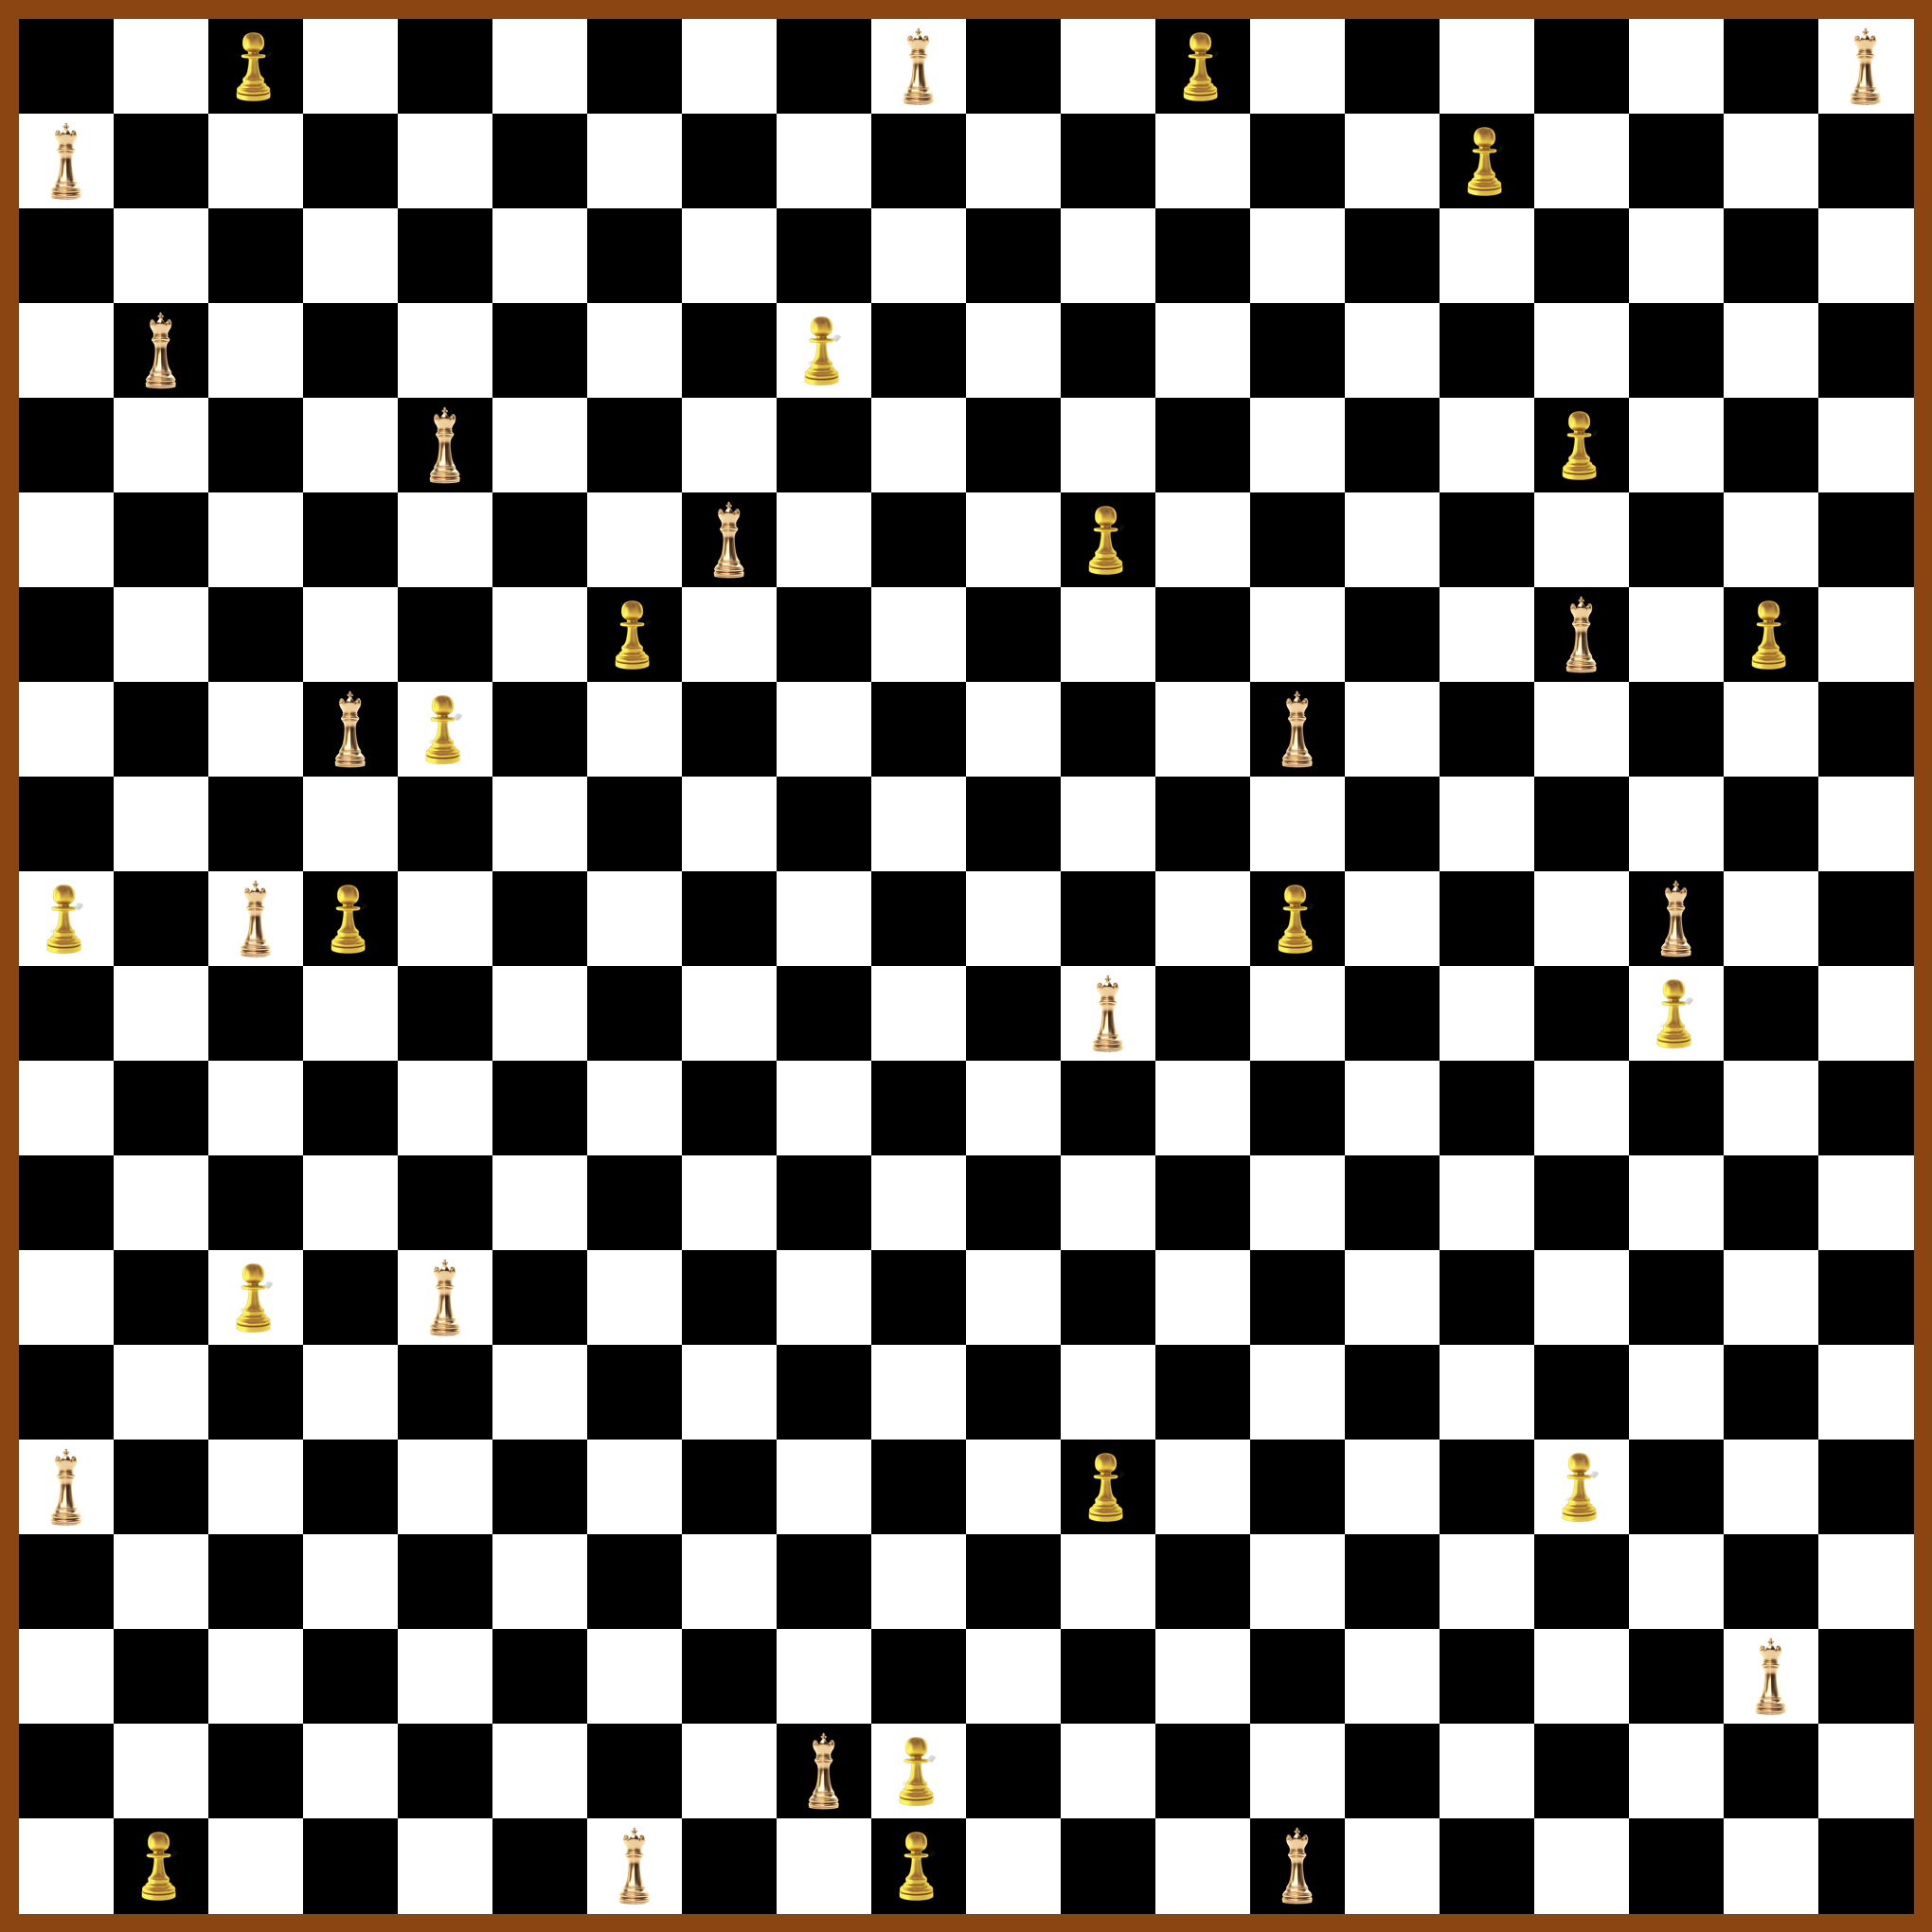

In [39]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.i. for dal

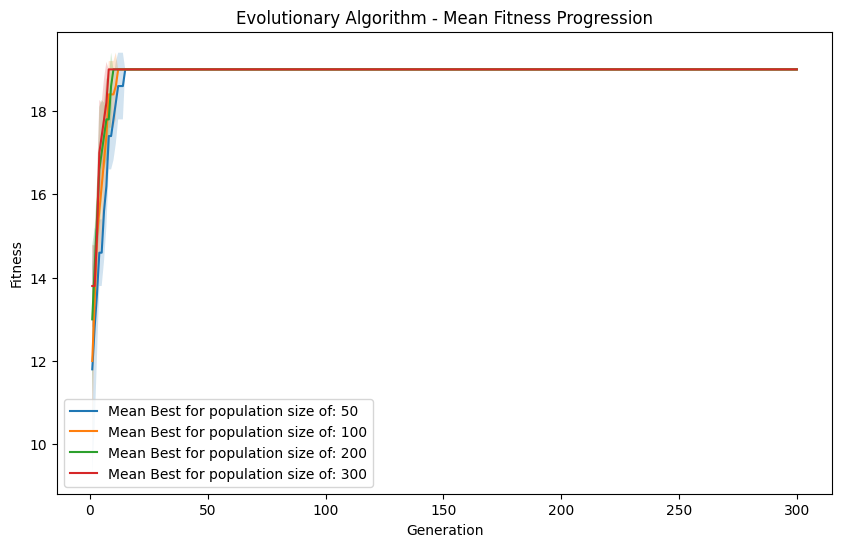

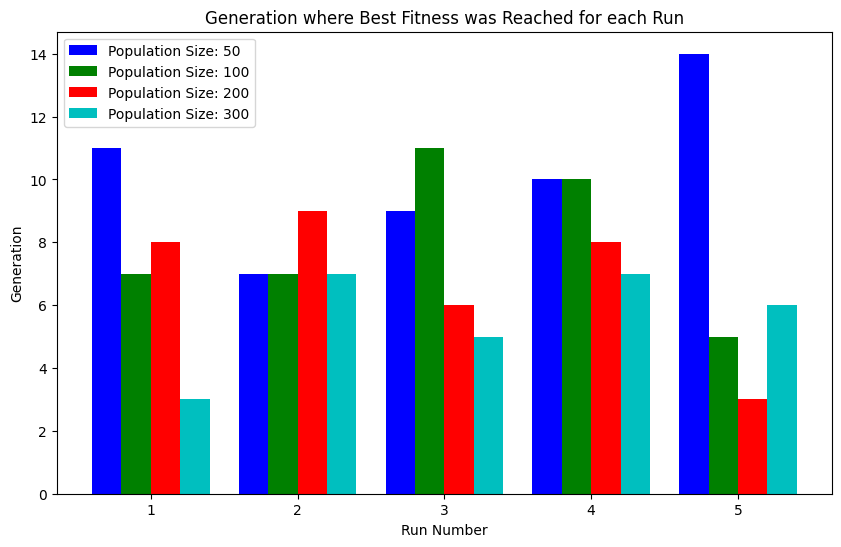

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 300
population_sizes = [50, 100, 200, 300]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {pop_size: [] for pop_size in population_sizes}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for population_size in population_sizes:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization and evolution loop...
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = binary_tournament_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[population_size].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, pop_size in enumerate(population_sizes):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for population size of: ' + str(pop_size))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, pop_size in enumerate(population_sizes):
    plt.bar(x + i * width, best_fitness_generations[pop_size], width=width, color=colors[i],
            label='Population Size: ' + str(pop_size))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(population_sizes) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

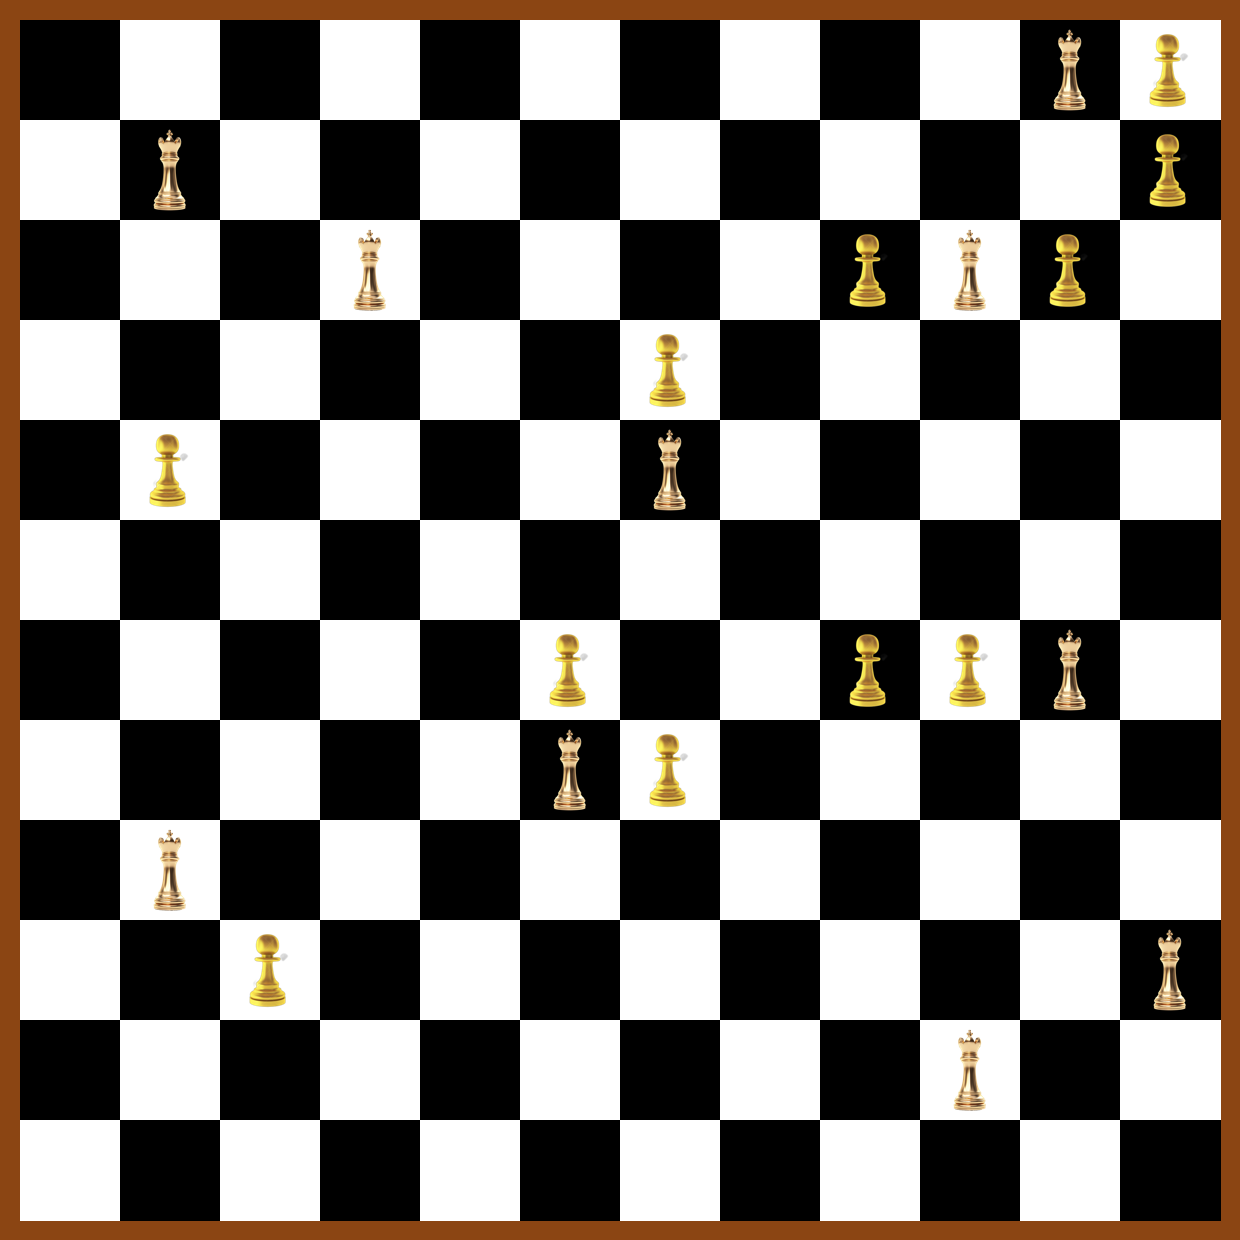

In [30]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.i. for he

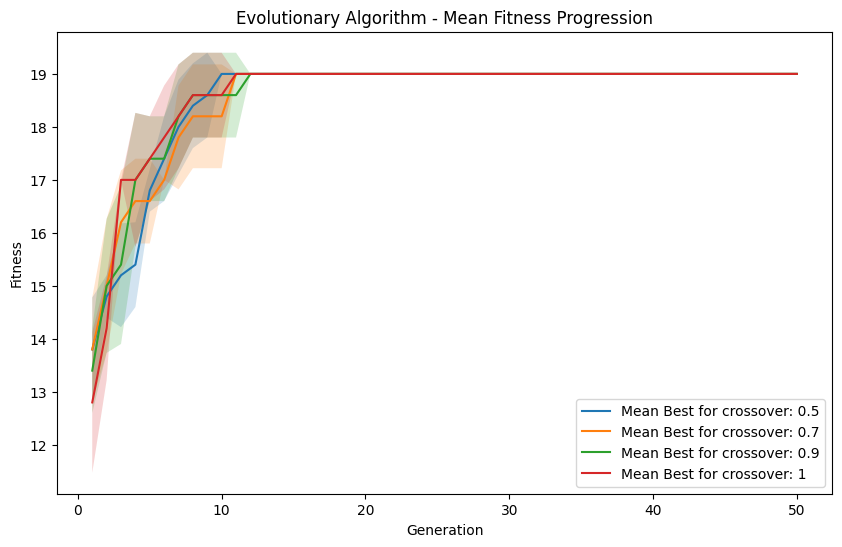

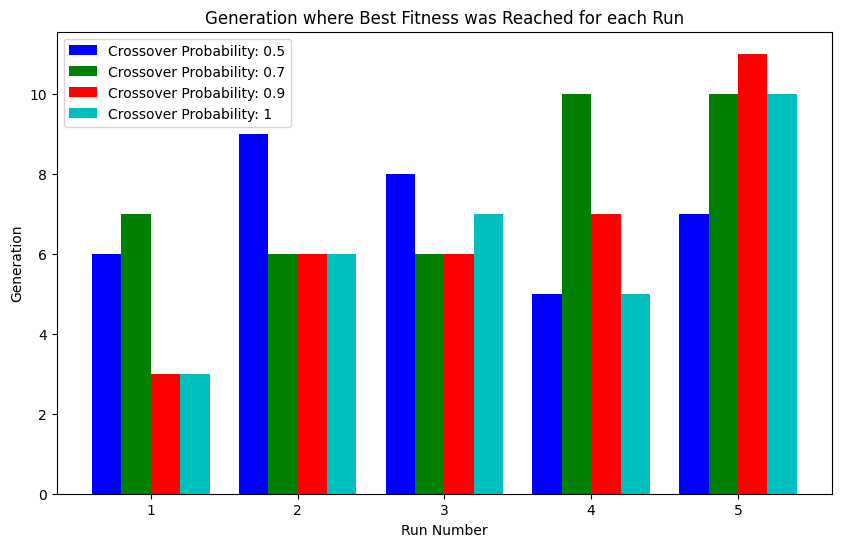

In [31]:
# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 50
population_size = 300

crossover_rates= [0.5, 0.7, 0.9, 1]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {crossover_rat: [] for crossover_rat in crossover_rates}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for crossover_rate in crossover_rates:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = binary_tournament_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair, crossover_rate)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[crossover_rate].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, crossover_rat in enumerate(crossover_rates):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for crossover: ' + str(crossover_rat))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, crossover_rat in enumerate(crossover_rates):
    plt.bar(x + i * width, best_fitness_generations[crossover_rat], width=width, color=colors[i],
            label='Crossover Probability: ' + str(crossover_rat))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(crossover_rates) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

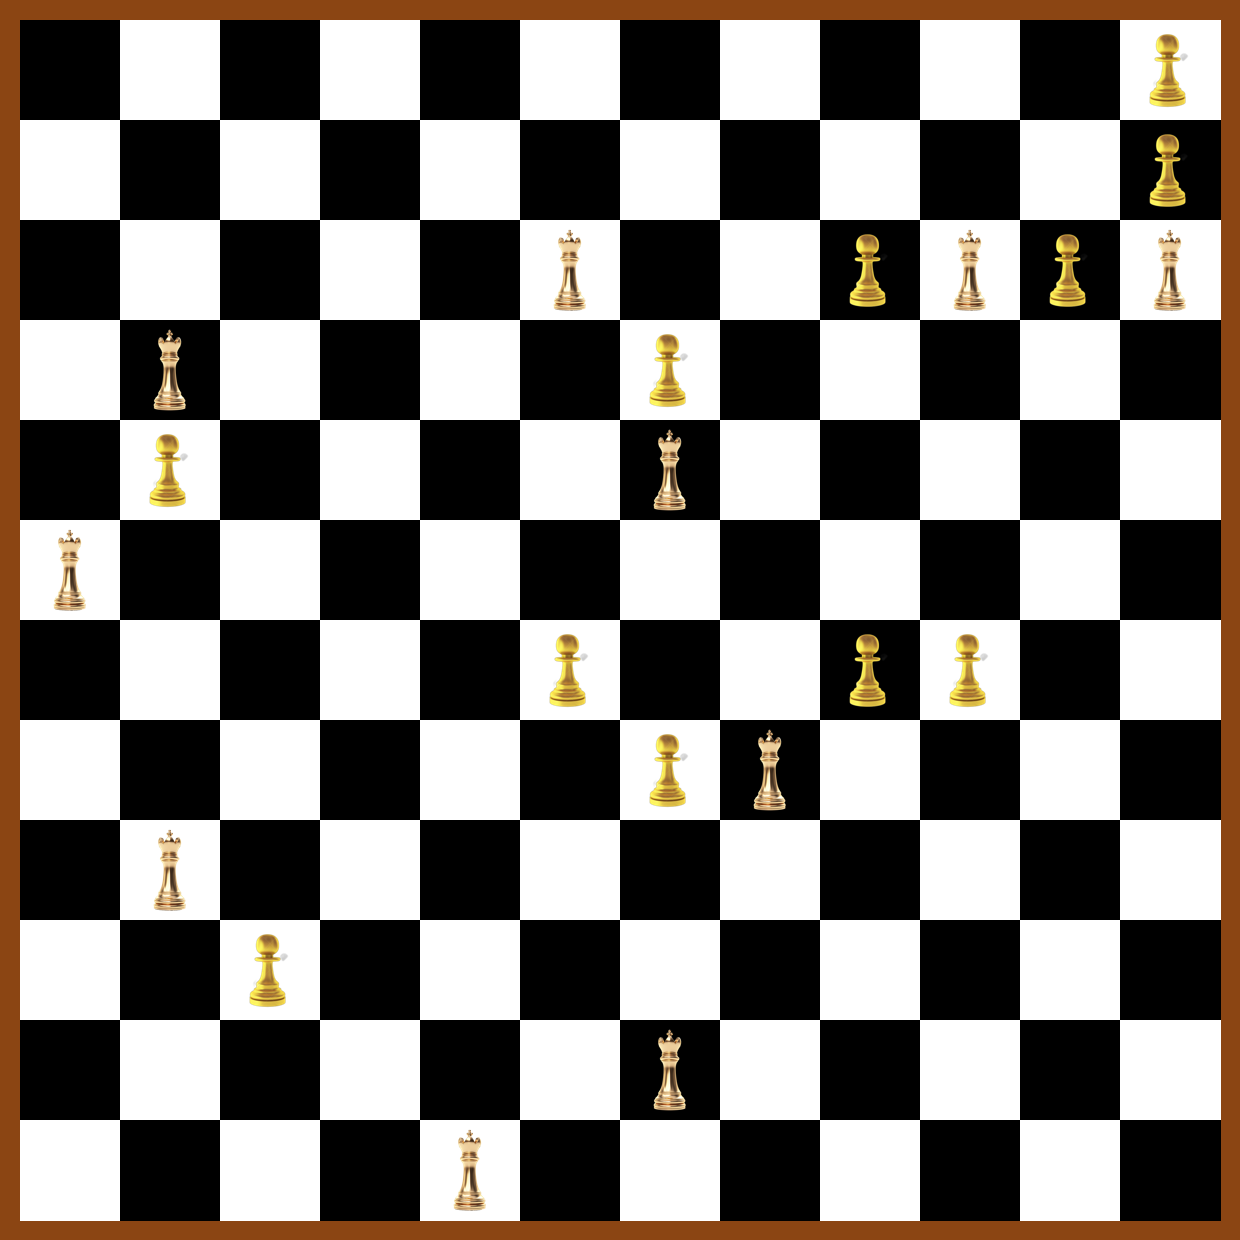

In [32]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")

# 1.i. for vav

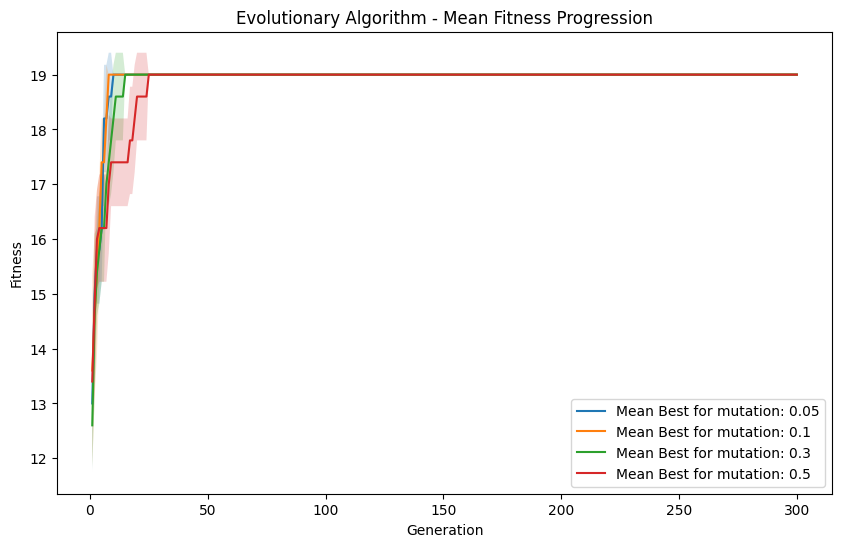

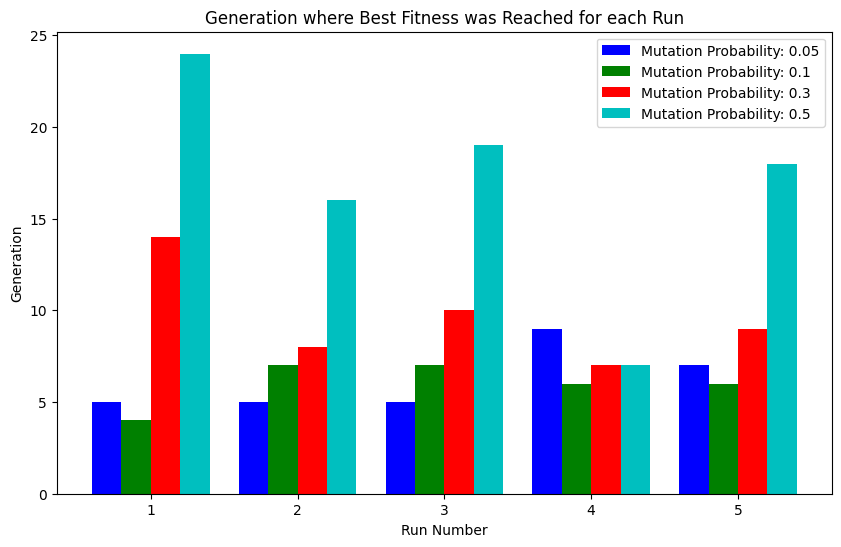

In [33]:
# Set the number of runs
num_runs = 5

# Set the number of generations and population size
num_generations = 300
population_size = 300

mutation_rates = [0.05, 0.1, 0.3, 0.5]

# Initialize a dictionary to store the generation where the best fitness was reached for each run
best_fitness_generations = {mutation_rat: [] for mutation_rat in mutation_rates}

# Initialize lists to store the mean and standard deviation of best fitness values for each generation
mean_best_fitness_values = []
std_best_fitness_values = []

for mutation_rate in mutation_rates:
    # Initialize lists to store the fitness values for each run
    best_fitness_values_all_runs = []
    worst_fitness_values_all_runs = []
    average_fitness_values_all_runs = []

    for run in range(num_runs):
        # Initialization
        Queens_population = initialize_population(population_size, n, SOLDIERS)

        # Lists to store best, worst, and average fitness values for each run
        best_fitness_values = []
        worst_fitness_values = []
        average_fitness_values = []

        # Evolution loop
        for generation in range(num_generations):
            # Evaluate population
            scores = evaluate_population(Queens_population, SOLDIERS)
            best_score = max(scores)
            worst_score = min(scores)
            average_score = sum(scores) / len(scores)

            # Store fitness values
            best_fitness_values.append(best_score)
            worst_fitness_values.append(worst_score)
            average_fitness_values.append(average_score)

            if best_score != Best_fitness:

                # Selection
                parents = binary_tournament_selection(Queens_population, scores, population_size)

                # Shuffle parentsPool
                random.shuffle(parents)

                # Randomly pair solutions
                paired_parents = []
                num_parents = len(parents)
                for i in range(0, num_parents, 2):
                    if i + 1 < num_parents:
                        paired_parents.append([parents[i], parents[i + 1]])
                    else:
                        # If the number of parents is odd, handle the last parent separately
                        paired_parents.append([parents[i]])

                # Crossover
                offspring = []
                for pair in paired_parents:
                    child1, child2 = crossover(pair)
                    offspring.append(child1)
                    offspring.append(child2)

                # Mutation
                for i in range(len(offspring)):
                    old_off = offspring[i]
                    offspring[i] = creep_mutation(offspring[i], SOLDIERS, mutation_rate)

                # Combine parents and offspring populations
                combined_population = parents + offspring

                # Evaluate combined population
                combined_scores = evaluate_population(combined_population, SOLDIERS)

                # Select the best individuals for the next generation
                sorted_indices = sorted(range(len(combined_scores)), key=lambda k: combined_scores[k], reverse=True)

                best_queens = combined_population[sorted_indices[0]]
                Queens_population = [combined_population[i] for i in sorted_indices[:population_size]]
                

        # Find the generation where the best fitness was reached
        best_generation = np.argmax(best_fitness_values)

        # Store the best generation for this run and population size
        best_fitness_generations[mutation_rate].append(best_generation)

        # Store fitness values for this run
        best_fitness_values_all_runs.append(best_fitness_values)
        worst_fitness_values_all_runs.append(worst_fitness_values)
        average_fitness_values_all_runs.append(average_fitness_values)

    # Calculate the mean and standard deviation for each generation across all runs
    mean_best_fitness_values.append(np.mean(best_fitness_values_all_runs, axis=0))
    std_best_fitness_values.append(np.std(best_fitness_values_all_runs, axis=0))

# Plotting the evolution graph
generations = range(1, num_generations + 1)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for i, mutation_rat in enumerate(mutation_rates):
    plt.plot(generations, mean_best_fitness_values[i][:num_generations], label='Mean Best for mutation: ' + str(mutation_rat))
    plt.fill_between(generations, mean_best_fitness_values[i][:num_generations] - std_best_fitness_values[i][:num_generations],
                     mean_best_fitness_values[i][:num_generations] + std_best_fitness_values[i][:num_generations], alpha=0.2)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolutionary Algorithm - Mean Fitness Progression')
plt.legend()

plt.savefig('evolution_plot.png')  # Save the plot to a file
plt.show()  # Display the plot

# Set up the bar chart
x = np.arange(num_runs)  # x-axis values (run numbers)
width = 0.2  # Width of the bars

# Set up the colors for each population size
colors = ['b', 'g', 'r', 'c']

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
for i, mutation_rat in enumerate(mutation_rates):
    plt.bar(x + i * width, best_fitness_generations[mutation_rat], width=width, color=colors[i],
            label='Mutation Probability: ' + str(mutation_rat))

# Add labels and title to the plot
plt.xlabel('Run Number')
plt.ylabel('Generation')
plt.title('Generation where Best Fitness was Reached for each Run')
plt.xticks(x + width * (len(mutation_rates) - 1) / 2, x + 1)
plt.legend()

plt.savefig('best_fitness_generations.png')  # Save the plot to a file
plt.show()  # Display the plot

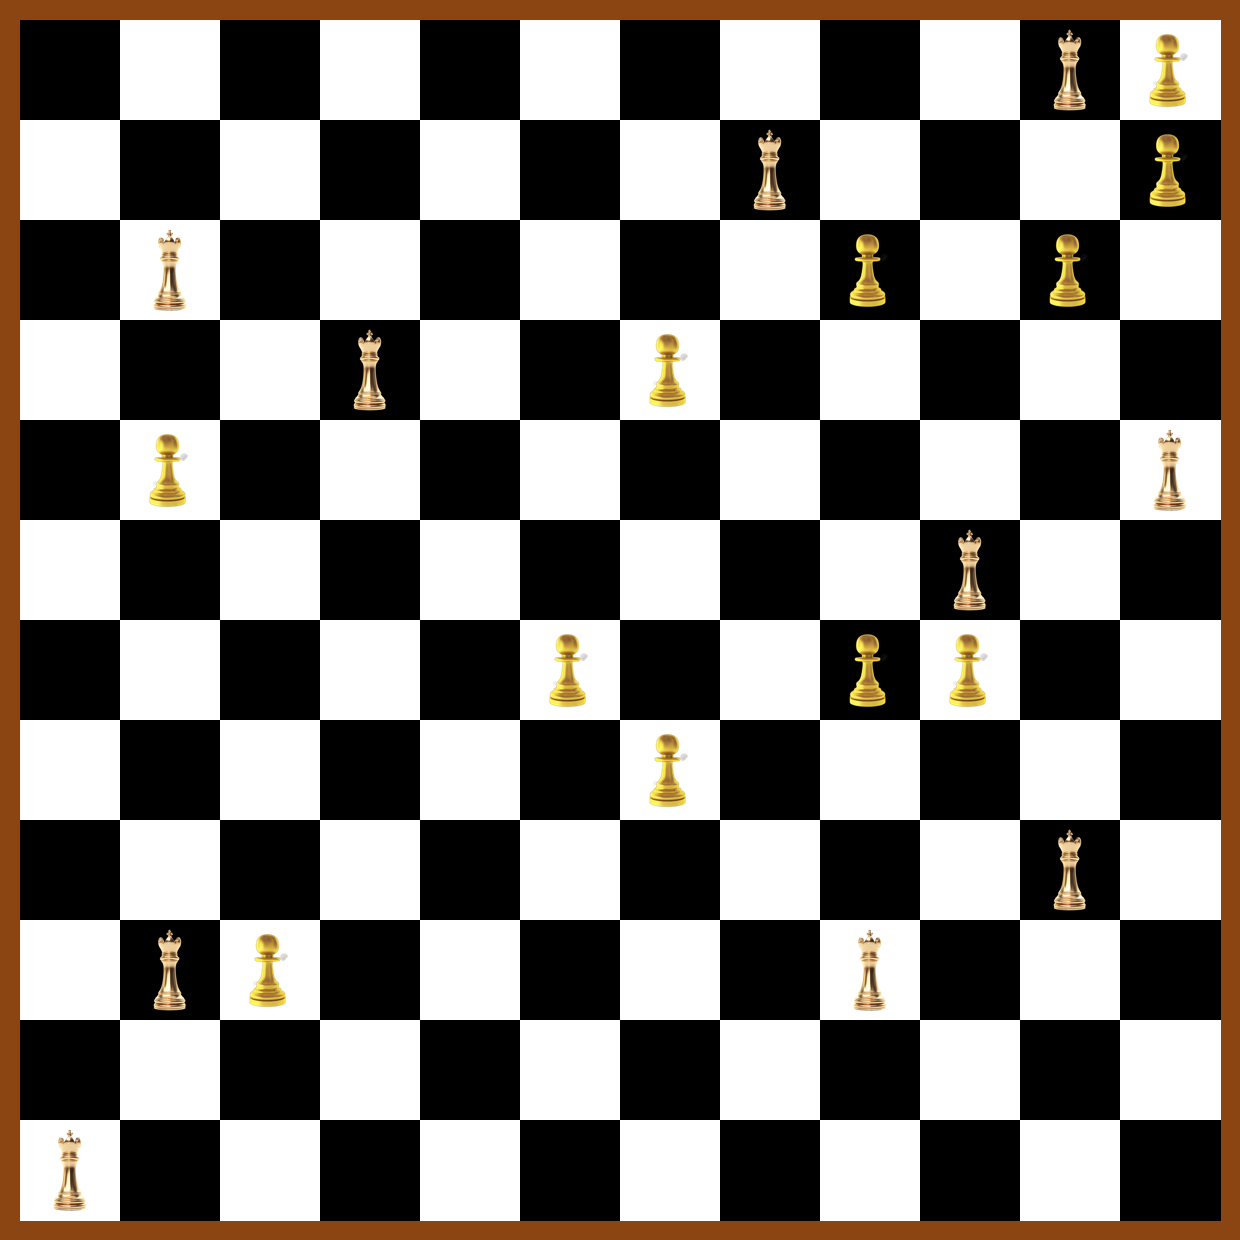

In [34]:
Queens = best_queens
 # Create the empty board
board = [[0 for _ in range(n)] for _ in range(n)]

for i in range(len(SOLDIERS)):
        board[SOLDIERS[i][0][0] - 1][SOLDIERS[i][0][1] - 1] = SOLDIERS[i][1]

for i in range(len(Queens)):
        board[Queens[i][0][0] - 1][Queens[i][0][1] - 1] = Queens[i][1]

chessboard_image = generate_chessboard(board)
display(chessboard_image)
chessboard_image.save("chessboard_2_a.png")